In [1]:
# Initialize Otter
import otter
grader = otter.Notebook("hw5.ipynb")

# CPSC 330 - Applied Machine Learning 

## Homework 5: Putting it all together 
### Associated lectures: All material till lecture 13 

<div class="alert-warning">
    
## Instructions  
rubric={points}

You will earn points for following these instructions and successfully submitting your work on Gradescope.  

### Before you start  

- Please **read carefully
[Use of Generative AI policy](https://ubc-cs.github.io/cpsc330-2025W1/syllabus.html#use-of-generative-ai-in-the-course)** before starting the homework assignment. 
  
- Review the [CPSC 330 homework instructions](https://ubc-cs.github.io/cpsc330-2025W1/docs/homework_instructions.html) for detailed guidance on completing and submitting assignments. 

### Group work instructions

**You may work with a partner on this homework and submit your assignment as a group.** Below are some instructions on working as a group.  
- The maximum group size is 2.
  
- Use group work as an opportunity to collaborate and learn new things from each other. 
- Be respectful to each other and make sure you understand all the concepts in the assignment well. 
- It's your responsibility to make sure that the assignment is submitted by one of the group members before the deadline. 
- You can find the instructions on how to do group submission on Gradescope [here](https://help.gradescope.com/article/m5qz2xsnjy-student-add-group-members).
- If you would like to use late tokens for the homework, all group members must have the necessary late tokens available. Please note that the late tokens will be counted for all members of the group.   
### Before submitting  

- **Run all cells** (▶▶ button) to ensure the notebook executes cleanly from top to bottom.

  - Execution counts must start at **1** and be sequential.
    
  - Notebooks with missing outputs or errors may lose marks.

- **Do not upload or push data files** used in this lab to GitHub or Gradescope. (A `.gitignore` is provided to prevent this.)  


### Submitting on Gradescope  

- Upload **only** your `.ipynb` file (with outputs shown) and any required output files. Do **not** submit extra files.
  
- If needed, refer to the [Gradescope Student Guide](https://lthub.ubc.ca/guides/gradescope-student-guide/).  
- If your notebook is too large to render, also upload a **Web PDF** or **HTML** version.  
  - You can create one using **File $\rightarrow$ Save and Export Notebook As**.  
  - If you get an error when creating a PDF, try running the following commands in your lab directory:  

    ```bash
    conda install -c conda-forge nbconvert-playwright
    jupyter nbconvert --to webpdf lab1.ipynb
    ```  

  - Ensure all outputs are visible in your PDF or HTML file; TAs cannot grade your work if outputs are missing.

</div>


_Note: Unlike previous assignments, this one is open-ended and project-style. Treat it as an opportunity to explore, experiment, and learn._

<!-- BEGIN QUESTION -->

## Imports

<div class="alert alert-warning">
    
Imports
    
</div>

_Points:_ 0

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import shap 

from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.dummy import DummyClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.experimental import enable_halving_search_cv  # noqa
from sklearn.feature_selection import SelectFromModel, RFECV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import make_scorer, f1_score
from sklearn.model_selection import (
    cross_val_score,
    cross_validate,
    StratifiedKFold,
    train_test_split,
    RandomizedSearchCV,
    HalvingGridSearchCV,
)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.svm import SVC
from sklearn.base import clone

<!-- END QUESTION -->

## Introduction

In this homework you will be working on an open-ended mini-project, where you will put all the different things you have learned so far together to solve an interesting problem.

A few notes and tips when you work on this mini-project: 

#### Tips
1. This mini-project is open-ended, and while working on it, there might be some situations where you'll have to use your own judgment and make your own decisions (as you would be doing when you work as a data scientist). Make sure you explain your decisions whenever necessary. 
2. **Do not include everything you ever tried in your submission** -- it's fine just to have your final code. That said, your code should be reproducible and well-documented. For example, if you chose your hyperparameters based on some hyperparameter optimization experiment, you should leave in the code for that experiment so that someone else could re-run it and obtain the same hyperparameters, rather than mysteriously just setting the hyperparameters to some (carefully chosen) values in your code. 
3. If you realize that you are repeating a lot of code try to organize it in functions. Clear presentation of your code, experiments, and results is the key to be successful in this lab. You may use code from lecture notes or previous lab solutions with appropriate attributions. 

#### Assessment
We plan to grade fairly and leniently. We don't have some secret target score that you need to achieve to get a good grade. **You'll be assessed on demonstration of mastery of course topics, clear presentation, and the quality of your analysis and results.** For example, if you just have a bunch of code and no text or figures, that's not good. If you do a bunch of sane things and get a lower accuracy than your friend, don't sweat it.


#### A final note
Finally, this style of this "project" question is different from other assignments. It'll be up to you to decide when you're "done" -- in fact, this is one of the hardest parts of real projects. But please don't spend WAY too much time on this... perhaps "a few hours" (10-14 hours???) is a good guideline for this project . Of course if you're having fun you're welcome to spend as much time as you want! But, if so, try not to do it out of perfectionism or getting the best possible grade. Do it because you're learning and enjoying it. Students from the past cohorts have found such kind of labs useful and fun and I hope you enjoy it as well. 

<br><br>

<!-- BEGIN QUESTION -->

## 1. Pick your problem and explain the prediction problem
<hr>
rubric={points:3}

In this mini project, you have the option to choose on which dataset you will be working on. The tasks you will need to carry on will be similar, independently of your choice.

### Option 1
You can choose to work on a classification problem of predicting whether a credit card client will default or not. 
For this problem, you will use [Default of Credit Card Clients Dataset](https://www.kaggle.com/uciml/default-of-credit-card-clients-dataset). In this data set, there are 30,000 examples and 24 features, and the goal is to estimate whether a person will default (fail to pay) their credit card bills; this column is labeled "default.payment.next.month" in the data. The rest of the columns can be used as features. You may take some ideas and compare your results with [the associated research paper](https://www.sciencedirect.com/science/article/pii/S0957417407006719), which is available through [the UBC library](https://www.library.ubc.ca/). 


### Option 2
You can choose to work on a regression problem using a [dataset](https://www.kaggle.com/dgomonov/new-york-city-airbnb-open-data) of New York City Airbnb listings from 2019. As usual, you'll need to start by downloading the dataset, then you will try to predict `reviews_per_month`, as a proxy for the popularity of the listing. Airbnb could use this sort of model to predict how popular future listings might be before they are posted, perhaps to help guide hosts create more appealing listings. In reality they might instead use something like vacancy rate or average rating as their target, but we do not have that available here.

> Note there is an updated version of this dataset with more features available [here](http://insideairbnb.com/). The features were are using in `listings.csv.gz` for the New York city datasets. You will also see some other files like `reviews.csv.gz`. For your own interest you may want to explore the expanded dataset and try your analysis there. However, please submit your results on the dataset obtained from Kaggle.


<div class="alert alert-info">
    
**Your tasks:**

1. Review the available datasets and choose the one you find most interesting. It may help to read through the dataset documentation on Kaggle before deciding.
2. Once you've selected a dataset, take time to understand the problem it represents and the meaning of each feature. Use the Kaggle documentation to guide you.
3. Download the dataset and load it into a pandas DataFrame.
4. Write a few sentences summarizing your initial thoughts about the problem and the dataset.
   
</div>

<div class="alert alert-warning">
    
Solution_1
    
</div>

_Points:_ 3

Our mini project will focus on the dataset described in Option 1. [Default of Credit Card Clients Dataset](https://www.kaggle.com/uciml/default-of-credit-card-clients-dataset) contains personal information about  30 000 bank clients (`SEX`, `EDUCATION`, `MARRIAGE`) as well as their transaction and repayment history from April 2005 to September 2005 (`PAY_0`, `BILL_AMT1`, `PAY_AMT1`). As described in the prediction problem, we will use binary classification to predict whether a credit card client will default or not(`default.payment.next.month`). A value of 1 indicates the client defaulted, while 0 indicates they paid on time. From a practical perspective, such a model would help banks and financial institutions reduce their risk of incurring 'bad debt' by avoiding clients likely to 'default'. Additionally, by identifying which features of a client's financial history and personal characteristics most strongly influence the likelihood of default, banks could proactively offer solutions, such as financial education programs. These programs would help clients manage their finances more effectively. In turn, this supports a healthier flow of capital that drives economic growth.

At first glance, we noticed that:  
  - Every feature is represented numerically, even the categorical features such as `MARRIAGE` and `EDUCATION`
    - All categorical variables (`MARRIAGE`, `SEX`, `EDUCATION`) don't have a natural order between the numeric values, and therefore, OneHotEncoding is likely required
  - There are no missing values within any feature column as described by: https://archive.ics.uci.edu/dataset/350/default+of+credit+card+clients, as well as seen in the `train_df.describe()` table below.
  - Repayment History (`PAY_0` to `PAY_6`) is likely crucial, as it captures a client's past ability to make payments for the credit card statement, which is probably indicative of their future habits
  - Bill Amounts and Payment Amounts (`BILL_AMT1`, `PAY_AMT1`) are likely correlated, as alongside other features, could provide insights into the financial behaviour of a client's ability to manage their debt
  - ID is unique for each customer and therefore an identifier rather than a useful feature for our predictive model
  - Education has two values that map to 'unknown' which we will want to combine to reduce redundancy.
  - The Datset does illustrate how to interpret values 0, and -2 present within the `PAY` columns, and thus no assumptions will be made, and the data will be treated independetly of the -1 and 1-9 which have a natural order. There is a response from the author in this discussion on what they mean: https://www.kaggle.com/datasets/uciml/default-of-credit-card-clients-dataset/discussion/34608, which we will be utilizing to interpret the values.
  - It is important to note that the dataset is from bank customers in Taiwan, with monetary values being in New Taiwan dollars

Overall, this dataset provides 22 features that likely correlate with predicting whether a customer will default, offering a practical application of what we have learned about classification towards risk prediction and financial decision-making.

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 2. Data splitting
<hr>
rubric={points:2}

<div class="alert alert-info">
    
**Your tasks:**

1. Split the data into train (70%) and test (30%) portions with `random_state=123`.

> If your computer cannot handle training on 70% training data, make the test split bigger.

</div>

<div class="alert alert-warning">
    
Solution_2
    
</div>

_Points:_ 2

In [3]:
# Read csv file
df = pd.read_csv("data/UCI_Credit_Card.csv")

# Standardize column names, instead of having a "." separating the words, modify it to have "_" instead
df = df.rename(columns={"default.payment.next.month" : "DEFAULT_PAYMENT_NEXT_MONTH"})

# Split the data into train (70%), test (30%) with random_state=123
train_df, test_df = train_test_split(df, test_size = 0.3, random_state = 123)

# Separating X and y from training set
X_train, y_train = train_df.drop(columns=["DEFAULT_PAYMENT_NEXT_MONTH"]), train_df["DEFAULT_PAYMENT_NEXT_MONTH"]

# Separating X and y from testing set
X_test, y_test = test_df.drop(columns=["DEFAULT_PAYMENT_NEXT_MONTH"]), test_df["DEFAULT_PAYMENT_NEXT_MONTH"]

train_df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT_PAYMENT_NEXT_MONTH
16395,16396,320000.0,2,1,2,36,0,0,0,0,...,19370.0,10155.0,3788.0,5000.0,5018.0,1000.0,3000.0,0.0,7013.0,0
21448,21449,440000.0,2,1,2,30,-1,-1,-1,0,...,171244.0,150897.0,117870.0,612.0,87426.0,130007.0,3018.0,15000.0,51663.0,0
20034,20035,160000.0,2,3,1,44,-2,-2,-2,-2,...,-18.0,-18.0,-18.0,0.0,0.0,0.0,0.0,0.0,0.0,0
25755,25756,120000.0,2,2,1,30,0,0,0,0,...,103058.0,71095.0,47379.0,3706.0,5502.0,4204.0,3017.0,2005.0,1702.0,0
1438,1439,50000.0,1,2,2,54,1,2,0,0,...,27585.0,27910.0,27380.0,0.0,1400.0,1200.0,1500.0,1000.0,1500.0,0


<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 3. EDA
<hr>
rubric={points:10}

<div class="alert alert-info">

**Your tasks:**

1. **Perform exploratory data analysis (EDA)**: Conduct an initial exploration of the training set to better understand its characteristics.

2. **Summarize and visualize the data**: Include at least **two summary statistics** and **two visualizations** that you find informative. For each, write **one sentence** explaining what insight it provides.

3. **Record your observations**: Summarize your **initial observations** about the dataset based on your EDA.

4. **Select evaluation metrics**: Choose one or more **appropriate metrics** for assessing model performance and briefly justify your choice.

</div>

<div class="alert alert-warning">
    
Solution_3
    
</div>

_Points:_ 10

- 2 Informative Summary Statistics:
    - Mean Age of clients: 35.486, & Median age of clients: 34.
        -  In general, a mean age above 30 suggests that clients are more financially stable and less likely to default, as they likely have at least a decade of work experience and have developed the self-sufficiency to manage their finances. 
        - However, this relationship may be influenced by other factors such as marital status, since individuals supporting a family or raising children may face higher financial demands despite their age or experience.

    - Average max overdue per client: 0.439
        - The metric illustrates that each client's worst delay is less than one month.
        - However, when comparing this data with the histograms, the value may be skewed, as when people default, they have a track record of missing multiple months in a row, which positively shifts the average. 

    - Average overdue across all months and clients: -0.182
        - On average across all months and clients, the bank in generelly safe againts people defaulting as a negative value posits that most people pay on time

    - Standard Deviation of overdue months across all clients: 0.982
        - There’s moderate variation among clients as some are consistently on time, others occasionally late, but extreme overdue cases are rare.

    - Average Credit Utilization: 0.373
        - On average, each client utilizes 37.3% of their credit card limit, which is not too high and not too low. Again, this is likely due to the class imbalance, which shows the general client being financially responsible; however, there is likely a correlation between credit utilization and defaulting that needs to be explored further in feature selection.

- 2 Informative Visualizations:
    - Based on the histograms displayed below:
        - `LIMIT_BAL` histogram:
            - It shows that on average, those with lower credit limits are more likely to default on their payment the following month.
        - `AGE` histogram:
            - It shows that people can default on their credit card payments regardless of age (age is then often associated with financial stability)
    - Side observations:
        - BILL_AMT# histograms:
            - Something interesting to note about these histograms is that it shows that those who owe less (i.e. their bill amount for the month is less), are more likely to default on their payment the following month.
        - PAY_AMT# histograms:
            - Obviously, those who don't pay off their bill are very likely to default on their payment the following month.
    - Bar Plot Observation:
        - Clear Class imbalance withtin the dataset, as expected
    - Feature Correlation Heat Map:
        - The `BILL_AMT1`-`BILL_AMT6` are highly correlated with a range from 0.81-0.95  
            - This means people's bill amounts are similar month to month, as they likely continue to spend at the same rate.
            - Since the columns are highly correlated, and oftentimes will have redundant information, using all six can cause multicollinearity
                - In a linear model, the model tries to assign coefficients to each feature. If the features are highly correlated, the model can't tell which one is the driving factor, so the coefficients start to "compete" or cancel each other out.
            - It is highly likely we will need to simplify the models into an average bill amount across all 6 months, to avoid the issue described above
        - The `PAY_0` - `PAY_6` are moderately correlated with a range of 0.47 to 0.82
            - This means that people's history of payments is correlated, and thus someone who pays late once is likely to keep paying late. However, there is still useful variation, as people might pay late one month and get caught up the next, and thus likely carry unique trends the model could generalize on
            - We do not need to combine `PAY_0` - `PAY_6`, but could potentially add a summary column

            
- Initial Observations About the Dataset:
    - There most likely is class imbalance in this dataset. Not only due to real world implications (people are much less likely to default), but you can see that the mean for the target column is a lot smaller than 0.5 (what the mean would be if the classes were balanced).
    - All of the values in the dataset are numerical values, but not necessarily numerical features
    - Despite all the columns containing numerical values, I believe that this dataset will still need encoding for the categorical features (i.e. education, marriage). So, we will need `OneHotEncoder`
    - There seems to be no null values, meaning no need for imputation
    - All of the numeric columns seem to have quite the broad range, so scaling is needed with `StandardScaler`
    - Columns to be dropped are ID, and likely all of the BILL_AMT# columns (we will then replace it with the average, to avoid the issue of multicollinearity amongst our models).
    - All other columns are already properly encoded (PAY_AMT# - Ordinal, SEX - Binary, etc.)
    
- Choice of Evaluation Metric(s):
    - No default = 0 = Negative class
    - Default = 1 = Positive class
    - F1 score: Given the class imbalance, it is important to consider both false positives and false negatives. While maximizing recall is crucial to identify high-risk borrowers, precision is equally important to avoid granting credit to users who may barely meet repayment criteria, as this could result in financial losses. The F1 score balances precision and recall, making it the best metric for evaluating model performance for this assignment.

In [4]:
# Provides summary statistics about the training dataframe
df.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT_PAYMENT_NEXT_MONTH
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [5]:
# Provides information about the count and datatype of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

In [6]:
numeric_cols = ['LIMIT_BAL', 'AGE', 'BILL_AMT1', 'BILL_AMT2', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6','BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']

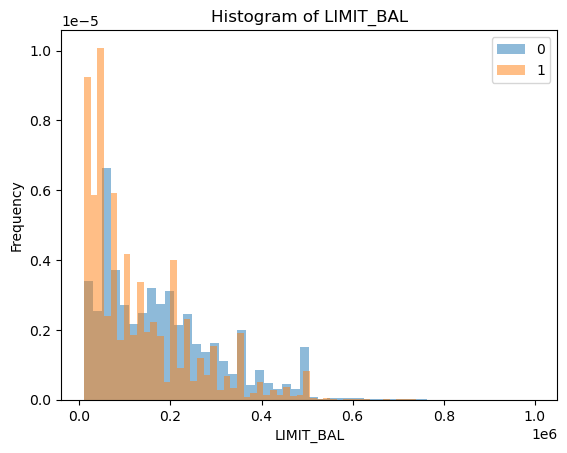

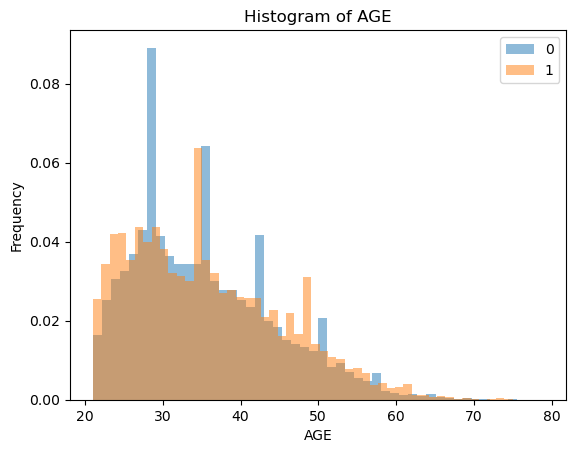

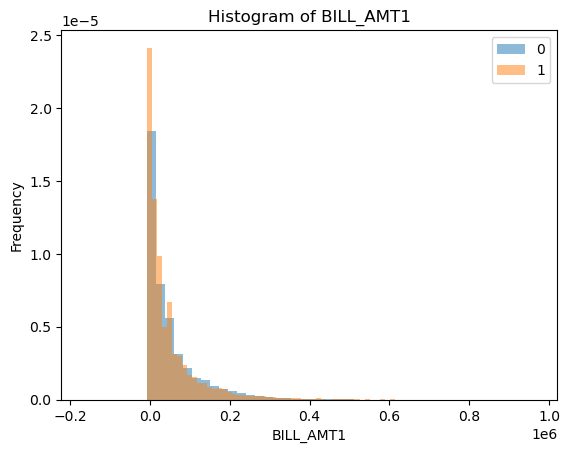

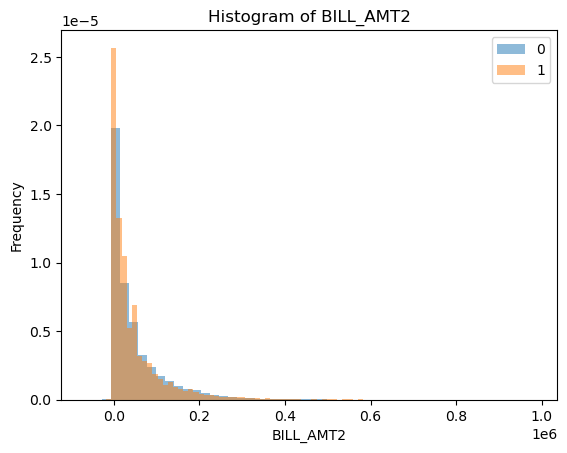

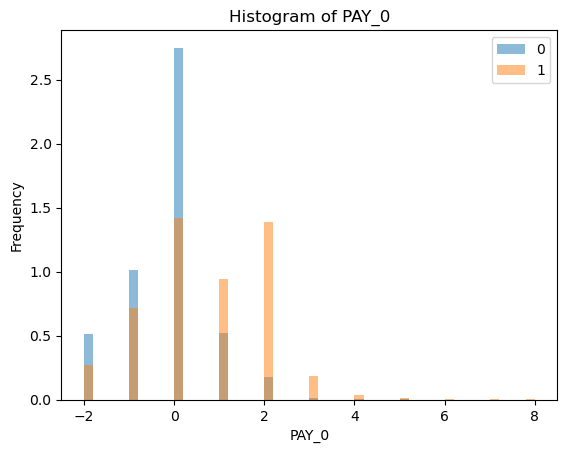

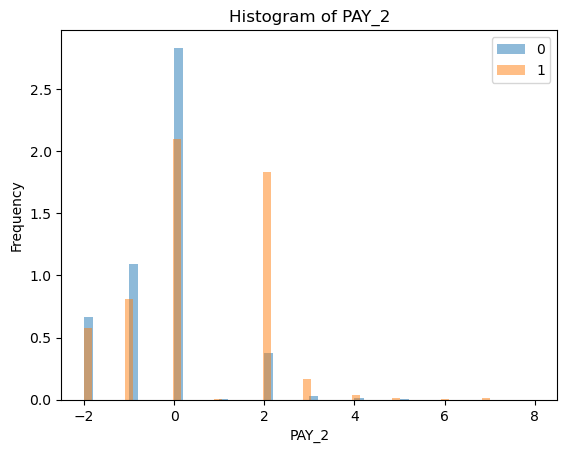

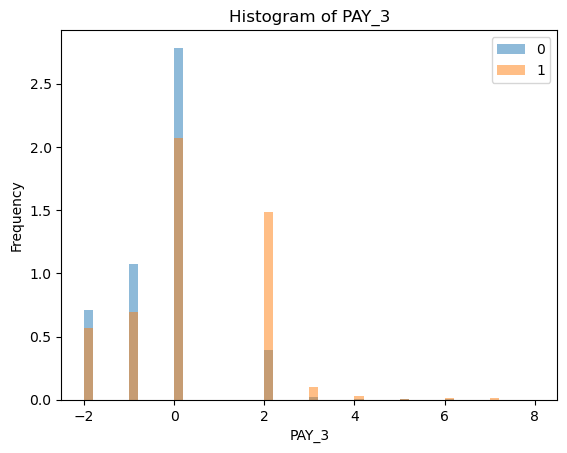

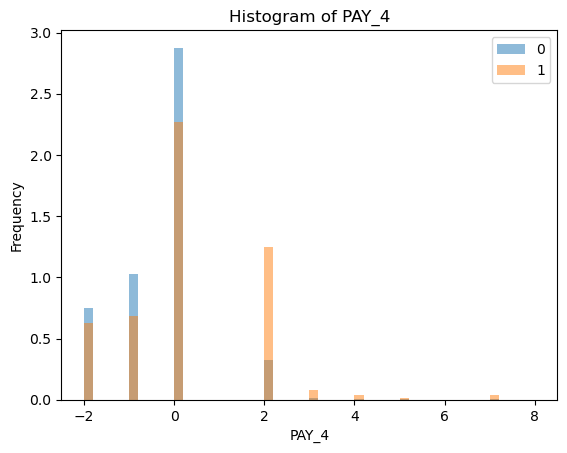

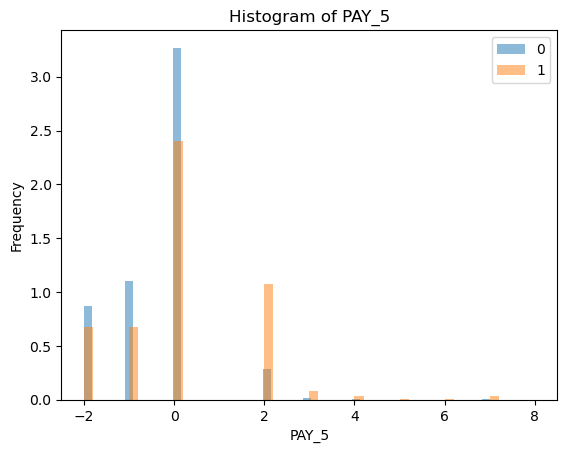

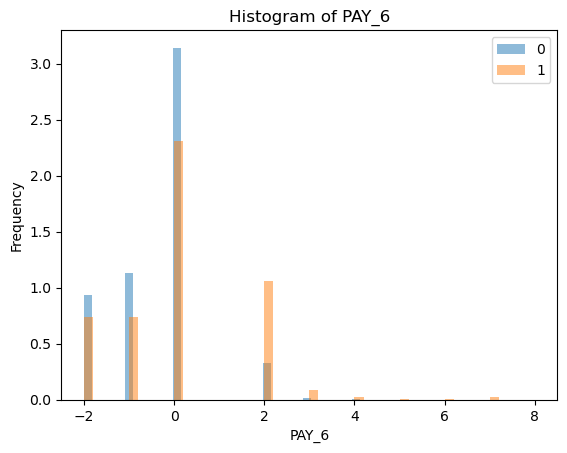

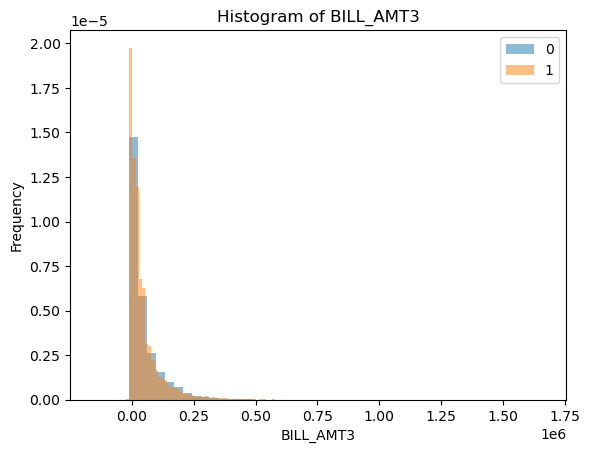

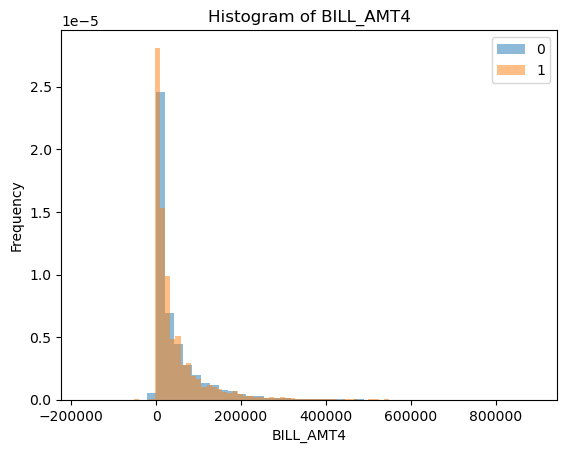

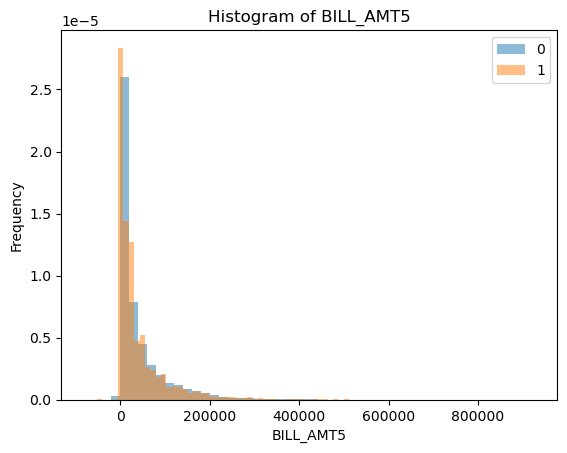

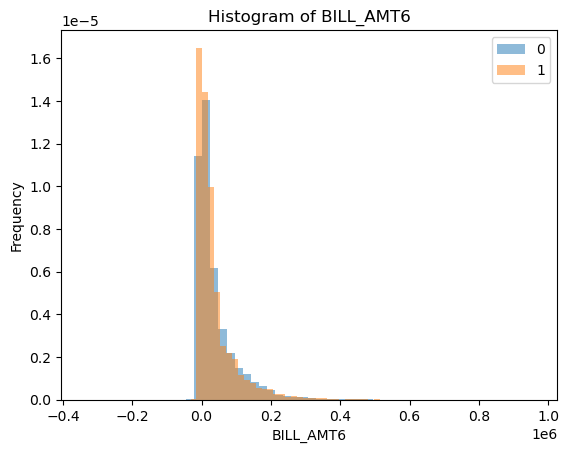

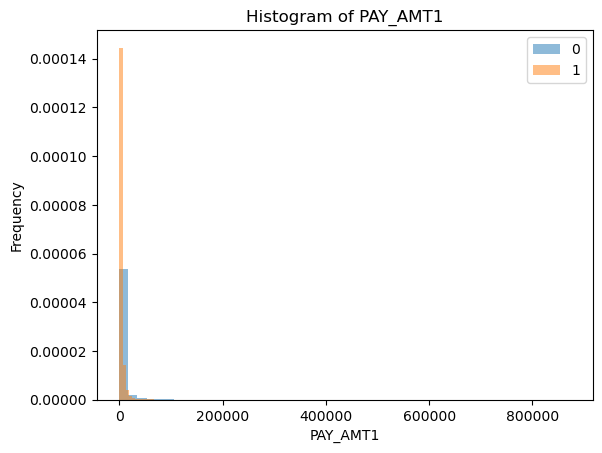

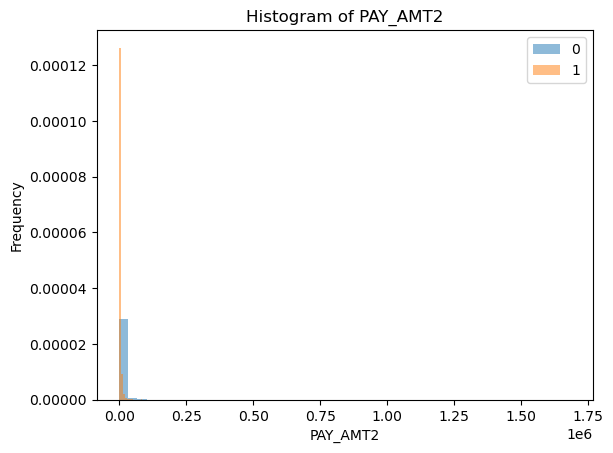

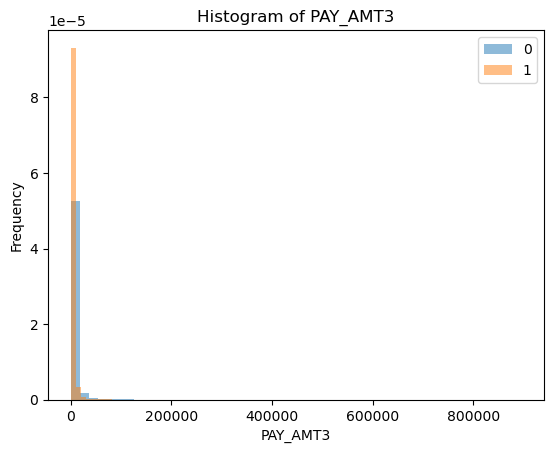

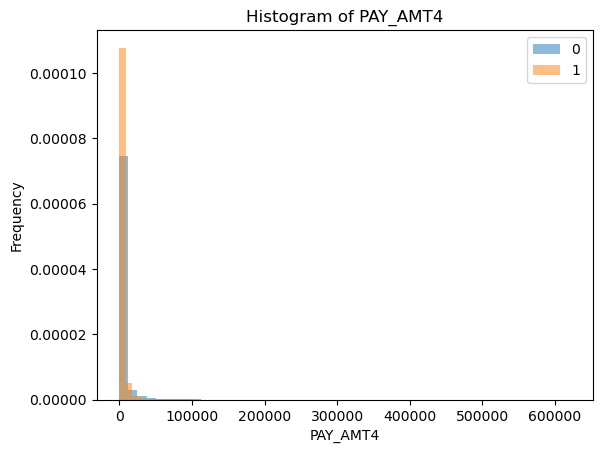

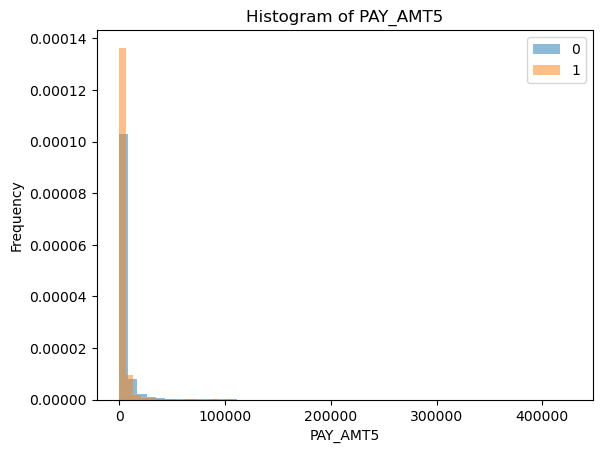

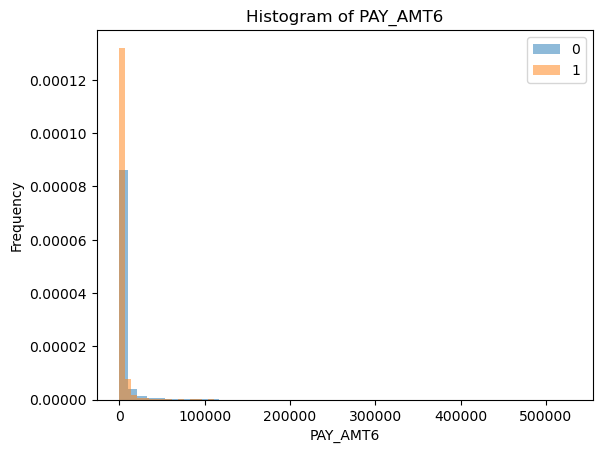

In [7]:
# adapted from hw2
# Displays a histogram for each of the numeric columns, with the legend representing the target column
for col in numeric_cols:
    df.groupby("DEFAULT_PAYMENT_NEXT_MONTH")[col].plot.hist(bins=50, alpha=0.5, legend=True, density = True, title = "Histogram of " + col)
    plt.xlabel(col)
    plt.show()

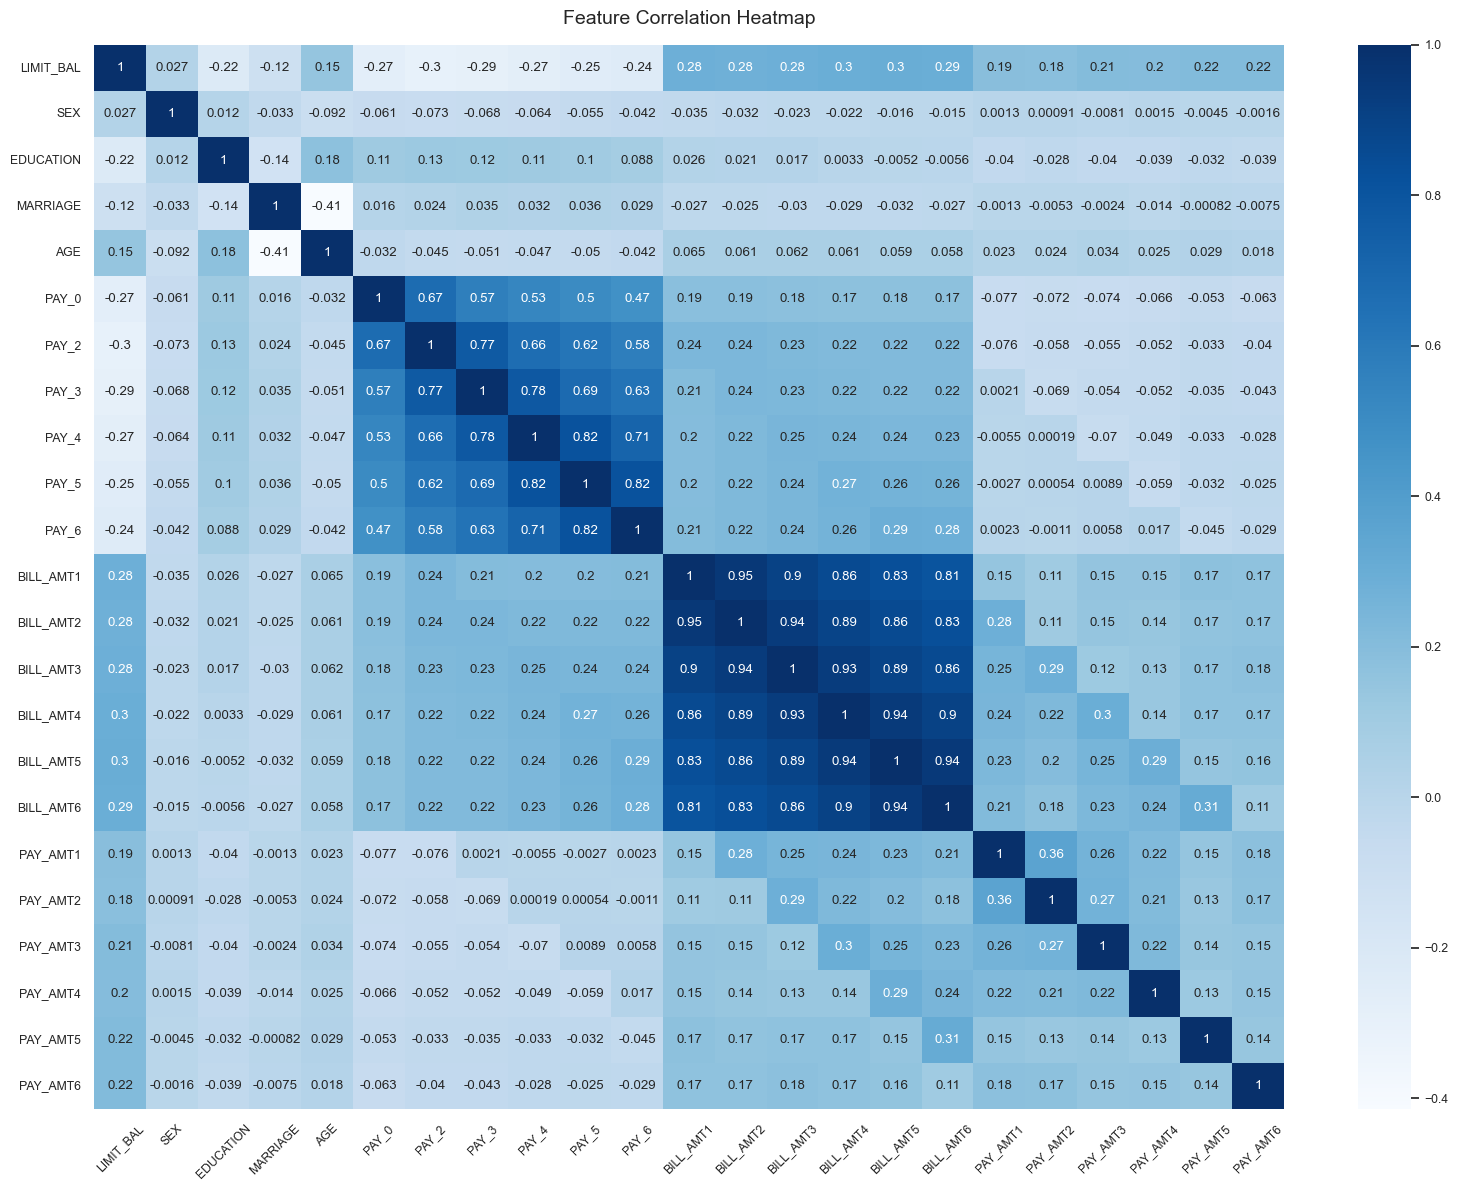

In [8]:
# Adapted from lecture 13
cor = pd.concat((y_train, X_train), axis=1).iloc[:, 2:25].corr()
plt.figure(figsize=(16, 12))
sns.set(font_scale=0.8)
sns.heatmap(cor, annot=True, cmap=plt.cm.Blues)

plt.title("Feature Correlation Heatmap", fontsize=14, pad=15)
plt.xticks(rotation=45)
plt.tight_layout()

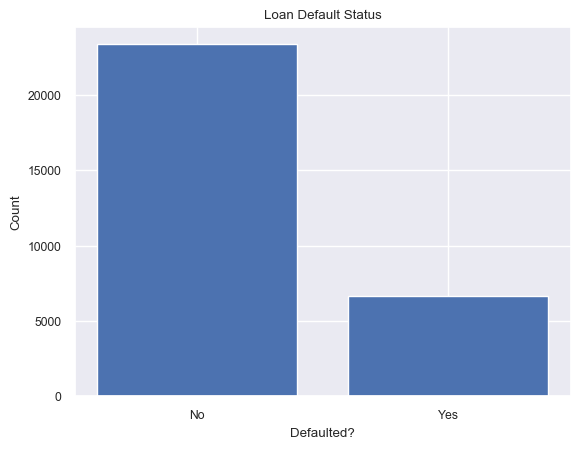

In [9]:
label_map = {1: 'Yes', 0: 'No'}
mapped = df['DEFAULT_PAYMENT_NEXT_MONTH'].map(label_map)

counts = mapped.value_counts()

plt.bar(counts.index, counts.values)

plt.title('Loan Default Status')
plt.xlabel('Defaulted?')
plt.ylabel('Count')
plt.show()


In [10]:
# Calculate Mean age of bank customer
mean_age = df['AGE'].mean()
print("Mean age of clients:", mean_age)

# Calculate Median age of bank customer
median_age = df['AGE'].median()
print("Median age of clients:", median_age)

Mean age of clients: 35.4855
Median age of clients: 34.0


In [11]:
# Calculate the maximum overdue per client first
max_overdue = df[['PAY_0','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6']].max(axis=1)

# Then take the mean across all clients
average_max_overdue= max_overdue.mean()
print("Average max overdue per client:", average_max_overdue)

Average max overdue per client: 0.4387333333333333


In [12]:
# Calculate the mean overdue per client across the 6 months 
average_overdue_all_months = df[['PAY_0','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6']].mean(axis = 1)

# Then take mean and standard deviation across all clients
average_overdue_all_clients = average_overdue_all_months.mean()
std_overdue_all_clients = average_overdue_all_months.std()

print("Average overdue across all months and clients:", average_overdue_all_clients)
print("Standard deviation of overdue across all months and clients:", std_overdue_all_clients)

Average overdue across all months and clients: -0.18243888888888887
Standard deviation of overdue across all months and clients: 0.9821759026607247


In [13]:
# Calculate the mean bill of client across the 6 months 
avg_bill_amt = df[['BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6']].mean(axis=1)

# Then take the ratio of average bill to spending limit
credit_card_util = avg_bill_amt / df['LIMIT_BAL']
print("Average credit utilization:", credit_card_util.mean())

Average credit utilization: 0.3730479457526812


<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 4. Feature engineering
<hr>
rubric={points:1}

<div class="alert alert-info">
    
**Your tasks:**

1. **Perform feature engineering**: Create new features that are relevant to the problem and use this updated feature set in the following exercises. You may need to iterate between **feature engineering** and **preprocessing** to refine your features and improve model performance.
   
</div>

<div class="alert alert-warning">
    
Solution_4
    
</div>

_Points:_ 1

In [14]:
# Adapted from User Juwonlo https://stackoverflow.com/questions/21702342/creating-a-new-column-based-on-if-elif-else-condition
for i in range(1,7):
    X_train[f'OUT_BAL{i}'] = X_train.apply(lambda row: row[f'BILL_AMT{i}'] + row[f'PAY_AMT{i}'] if row[f'BILL_AMT{i}'] < 0 else row[f'BILL_AMT{i}'] - row[f'PAY_AMT{i}'], axis = 1)
    X_test[f'OUT_BAL{i}'] = X_test.apply(lambda row: row[f'BILL_AMT{i}'] + row[f'PAY_AMT{i}'] if row[f'BILL_AMT{i}'] < 0 else row[f'BILL_AMT{i}'] - row[f'PAY_AMT{i}'], axis = 1)


# Adapted from User Stefan https://stackoverflow.com/questions/34734940/row-wise-average-for-a-subset-of-columns-with-missing-values
out_bal_cols = ['OUT_BAL1', 'OUT_BAL2', 'OUT_BAL3', 'OUT_BAL4', 'OUT_BAL5', 'OUT_BAL6']
X_train['OUT_BAL_AVG'] = X_train[out_bal_cols].mean(axis=1)
X_test['OUT_BAL_AVG'] = X_test[out_bal_cols].mean(axis=1)

bill_cols = ['BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6']
X_train['BILL_AMT_AVG'] = X_train[bill_cols].mean(axis=1)
X_test['BILL_AMT_AVG'] = X_test[bill_cols].mean(axis=1)

# `LIMIT_BAL` never <= 0
X_train['CRED_UTIL_AVG'] = X_train['BILL_AMT_AVG'] / X_train['LIMIT_BAL']
X_test['CRED_UTIL_AVG'] = X_test['BILL_AMT_AVG'] / X_test['LIMIT_BAL']

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 5. Preprocessing and transformations
<hr>
rubric={points:10}

<div class="alert alert-info">
    
**Your tasks:**

1. **Identify feature types**: Determine the different types of features in your dataset (e.g., numerical, categorical, ordinal, text) and specify the transformations you would apply to each type.

2. **Define a column transformer (if needed)**: Implement a `ColumnTransformer` to apply the appropriate preprocessing steps to each feature type.
 
</div>

<div class="alert alert-warning">
    
Solution_5
    
</div>

_Points:_ 10

In [15]:
X_train.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,PAY_AMT6,OUT_BAL1,OUT_BAL2,OUT_BAL3,OUT_BAL4,OUT_BAL5,OUT_BAL6,OUT_BAL_AVG,BILL_AMT_AVG,CRED_UTIL_AVG
count,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,...,21000.000000,21000.000000,2.100000e+04,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000
mean,14962.348238,167880.651429,1.600762,1.852143,1.554000,35.500810,-0.015429,-0.137095,-0.171619,-0.225238,...,5237.762190,45701.225333,4.371085e+04,42096.592952,39067.777810,36030.322333,34104.208286,40118.496278,44987.856262,0.372906
std,8650.734050,130202.682167,0.489753,0.792961,0.521675,9.212644,1.120465,1.194506,1.196123,1.168556,...,18116.846563,72744.642075,7.191606e+04,68944.717102,64313.544148,60572.208954,59747.060925,60764.081192,63465.528940,0.353387
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,0.000000,-733744.000000,-1.038728e+06,-854641.000000,-502024.000000,-414380.000000,-528466.000000,-445252.333333,-56043.166667,-0.200154
25%,7498.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,110.750000,892.750000,4.722500e+02,404.750000,390.000000,0.000000,0.000000,1058.833333,4750.125000,0.029820
50%,14960.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,1500.000000,18637.500000,1.814850e+04,17883.000000,17163.000000,15614.000000,13912.000000,17342.750000,21043.250000,0.281744
75%,22458.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,4000.000000,62257.500000,5.906575e+04,56389.000000,50928.000000,47343.750000,46438.250000,51290.500000,57113.625000,0.686824
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,528666.000000,913727.000000,1.024301e+06,854454.000000,841586.000000,877171.000000,911408.000000,686013.333333,877313.833333,5.364308


| Feature | Transformation | Explanation
| --- | ----------- | ----- |
| ID | drop |  A numeric feature with no missing values, ranging from 1 to 30 000. ID is a unique identifier for each client and therefore does not provide any information to any model|
| LIMIT_BAL | scaling with `StandardScaler` | A numeric feature with no missing values, ranging from 10 thousand to 1 million. Either MinMaxScaler or StandardScaler can be used to prevent feature dominance, but we will utilize StandardScaler, as we cover it in more depth within the class.| 
| SEX | value shift | A categorical features expressed as numeric with no missing values, ranging from 1 to 2. One means male and two means female. Shifting the values down by 1 for interpretability and compatibility with models due to a switch towards a binary framework.|
| EDUCATION | `.replace()`, one-hot encoding | A categorical feature expressed as numeric with no missing values, with 6 unique values that represent the education level of the client. However, values 5 and 6 are both labelled as unknown, so will be combined to reduce redundancy, as there is no clear distinction between the two labels. One-hot encoding is used to convert numeric labels into separate columns, since there is no ranking or natural order among the education levels described in the dataset.|
| MARRIAGE | one-hot encoding | A categorical feature expressed as a numeric value without missing values from 1 to 3, which represents the marital status of a client. One-hot encoding is used for the MARRIAGE column, as there is a clear natural rank and order among the different marital statuses. Hence, each value needs to be separated into its own column. |
| AGE | scaling with `StandardScaler` | A numeric feature with no missing values and a range of 21 - 79 years old. Scaling is recommended due to its distinct range compared to other numeric features. While MinMaxScaler might be more suitable, using StandardScaler should be fine too.|
| PAY_0 - PAY_6 | oridinal encoding | Numeric features with no missing values about each client's repayment status, ranging from -2 to 8. Ordinal encoding is used because the values have a clear natural order, reflecting the months in which a client has not paid the minimum balance on their credit card. However, in ordinal encoding, -2 and -1 represent the same value: -2 indicates no consumption, and -1 means paid in full, both resulting in an outstanding balance of 0. Nevertheless, a user who has no consumption in a particular month could provide additional data that gives further insight to the model, so a separate column is created to retain that information.|
| BILL_AMT1 - BILL_AMT5 | drop | Numeric feature with a range of 1 thousand to 1 million and no missing values, representing the amount of the bill statement. In EDA, we observed that all these columns are highly correlated and therefore likely to lead to multicollinearity. To prevent this from harming our models, we created a column that averages the monthly bills.|
| PAY_AMT1 - PAY_AMT6 | scaling with `StandardScaler`  | Numeric features with a range of 0 to almost 1.7 million and no missing values represent the amount of previous payments. Scaling is required to prevent larger numeric features from dominating smaller ones, such as age. Although MinMaxScaler is better in this situation, as it aligns with the ranges of all the one-hot-encoded columns, we have decided to use StandardScaler.|
| OUT_BAL1-OUT_BAL6| scaling with `StandardScaler` | Numeric features with a range of 0 to almost 1 million and no missing values represent the outstanding balance. Due to the wide range of values in this numeric feature, scaling is recommended. Either MinMaxScaler or StandardScaler can be used to prevent feature dominance, but we will utilize StandardScaler, as we cover it in more depth within the class.| 
| OUT_BAL_AVG | scaling with `StandardScaler` | A numeric feature with a range of 1000 to almost 700,000 and no missing values represents the average outstanding balance of a client across the 6 months. Standard scaler will be used to prevent a feature of this scale from imposing feature dominance over other smaller numeric features in the model. | 
| BILL_AMT_AVG | scaling with `StandardScaler` | A numeric feature with no missing values and a range of around 5 thousand to 900 thousand, which represents the average monthly bill of clients across the 6 months. Scaling is required because the values have high variance and magnitude, potentially leading to feature dominance.|
| CRED_UTIL_AVG | scaling with `StandardScaler` | A numeric feature with no missing values and a range of -0.2 to around 5, which represents the percentage of their credit limit that they spend on average every month. Standard scaling is needed to ensure the same range across all features, so no feature has a higher weight in any numeric-based model.| 


In [16]:
# Combine both 'unknown' education values:
X_train['EDUCATION'] = X_train['EDUCATION'].replace(6, 5)
X_test['EDUCATION'] = X_test['EDUCATION'].replace(6, 5)

# Split -2 and 0 values in PAY columns as unsure what they mean
ordinal_feats = ['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']

for col in ordinal_feats:
    # Create seperate binary columns for -2
    X_train[f'{col}_MINUS2'] = X_train.apply(lambda row: 1 if row[col] == -2 else 0, axis=1)
    X_test[f'{col}_MINUS2'] = X_test.apply(lambda row: 1 if row[col] == -2 else 0, axis=1)

    # Replace all -2 to -1 because same meaning within the natural order rank
    X_train[col] = X_train[col].replace(-2, -1)
    X_test[col] = X_test[col].replace(-2, -1)


# For interpretability set `SEX` to 0 & 1
X_train['SEX'] = X_train['SEX'] - 1
X_test['SEX'] = X_test['SEX'] - 1


In [17]:
# List of all the features
numeric_feats = ['LIMIT_BAL', 'AGE', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
                                     'OUT_BAL1', 'OUT_BAL2', 'OUT_BAL3', 'OUT_BAL4', 'OUT_BAL5', 'OUT_BAL6',
                                     'OUT_BAL_AVG', 'BILL_AMT_AVG' , 'CRED_UTIL_AVG']
categorical_feats = ['EDUCATION', 'MARRIAGE']
pass_feats = ['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'SEX', 'PAY_0_MINUS2', 'PAY_2_MINUS2', 'PAY_3_MINUS2', 
                                'PAY_4_MINUS2', 'PAY_5_MINUS2', 'PAY_6_MINUS2']
drop_feats = ['ID', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']

In [18]:
numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
preprocessor = make_column_transformer(
               (numeric_transformer, numeric_feats),
               (categorical_transformer, categorical_feats),
               ('passthrough', pass_feats),
               ('drop', drop_feats)
)

In [19]:
clone_preprocessor = clone(preprocessor)
transformed_train = clone_preprocessor.fit_transform(X_train)

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 6. Baseline model
<hr>
rubric={points:2}

<div class="alert alert-info">
    
**Your tasks:**

1. **Establish a baseline**: Use one of `scikit-learn`’s baseline models (e.g., `DummyClassifier` or `DummyRegressor`, depending on your task) and report the results. This will serve as a reference point for evaluating the performance of your more advanced models.

</div>

<div class="alert alert-warning">
    
Solution_6
    
</div>

_Points:_ 2

In [20]:
X_train_mini, X_val, y_train_mini, y_val = train_test_split(
    X_train, y_train, test_size=0.2, stratify=y_train, random_state=123
)

def optimize_f1_threshold(model):
    model.fit(X_train_mini, y_train_mini)
    y_pred = model.predict_proba(X_val)[:, 1]
    thresholds = np.linspace(0, 1, 101)
    best_t, best_f1 = 0.5, 0
    for t in thresholds:
        y_pred_bin = (y_pred >= t).astype(int)
        f1 = f1_score(y_val, y_pred_bin, average='macro')
        if f1 > best_f1:
            best_t, best_f1 = t, f1
    
    model.best_threshold_ = best_t  
    return best_t


def f1_thresholded_scorer(threshold):
    def scorer(estimator, X, y_true):
        y_pred = estimator.predict_proba(X)[:, 1]
        y_pred_bin = (y_pred >= threshold).astype(int)
        return f1_score(y_true, y_pred_bin, average='macro')
    return scorer


def mean_std_f1_scores(model, X_train, y_train, **kwargs):
    threshold = optimize_f1_threshold(model)
    scorer = f1_thresholded_scorer(threshold)
    scores = cross_validate(model, X_train, y_train, scoring=scorer, **kwargs)

    mean_scores = pd.DataFrame(scores).mean()
    std_scores = pd.DataFrame(scores).std()
    out_col = [
        f"{mean_scores.iloc[i]:0.5f} (+/- {std_scores.iloc[i]:0.5f})"
        for i in range(len(mean_scores))
    ]
    return pd.Series(data=out_col, index=mean_scores.index)

In [21]:
# Adapted from hw3
results_dict = {}  # dictionary to store all the results
dummy = DummyClassifier(random_state=123)
pipe_dummy = make_pipeline(clone(preprocessor), dummy)
results_dict["dummy"] = mean_std_f1_scores(
    pipe_dummy, X_train, y_train, cv=5, return_train_score=True
)

In [22]:
# Adapted from hw3
results_df = pd.DataFrame(results_dict).T
results_df

,fit_time,score_time,test_score,train_score
dummy,0.00866 (+/- 0.00041),0.00309 (+/- 0.00016),0.43718 (+/- 0.00004),0.43718 (+/- 0.00001)


<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 7. Linear models 
<hr>
rubric={points:10}

<div class="alert alert-info">
    
**Your tasks:**

1. **Train a linear model**: Use a linear model as your first real attempt at solving the problem.

2. **Tune hyperparameters**: Perform hyperparameter tuning to explore different values of the model's complexity parameter. 

3. **Evaluate with cross-validation**: Report the cross-validation scores along with their standard deviation.

4. **Summarize findings**: Summarize your results, highlighting key observations from your experiments.

</div>

<div class="alert alert-warning">
    
Solution_7
    
</div>

_Points:_ 10

- Results:
    - Our key result of the logistic regression is a F1 validation score of 0.70263 (+/- 0.00782) with a F1 train score of 0.70366 (+/- 0.00183). 
    - The non-tuned logictic regression model achieved a F1 validation score of 0.70186 (+/- 0.00667)  and a F1 train score of 0.70348 (+/- 0.00147).
    - Our best C value for the logistic regression model is C equals 1000.
    - In tuning the model, we improved the model by  0.00077.
    - Fit time and score time was quite fast for both models of less 0.04 seconds
- Key Observations:
    - F1 of around 0.7 means that our model is generalizing well and balancing between precision and recall despite the class imbalance of around 80 to 20, where 80 is negative (no default) and 20 is positive (defaulting).
    - The small variance of both the validation and train set, and in their standard deviation, we can be confident our model is stable and consistent across folds, and therefore not overfitting or underfitting on the data. 
    - In not overfitting or underfitting, we can be confident that our model has generalized well, especially due to the validation and test scores being almost identical (0.70263 vs. 0.70366).
    - The improvement between the original model and tuned model is 0.00077, which is of little to no statistically significant improvement.
    - As observed by the graph below, in tuning the hyperparameter `C` for logistic regression, there are minimal gains across the different `C` values.

In [23]:
lr = LogisticRegression()
pipe_lr = make_pipeline(clone(preprocessor), lr)
results_dict['logistic regression'] = mean_std_f1_scores(pipe_lr, X_train, y_train, cv=5, return_train_score=True)
results_df = pd.DataFrame(results_dict).T
results_df

,fit_time,score_time,test_score,train_score
dummy,0.00866 (+/- 0.00041),0.00309 (+/- 0.00016),0.43718 (+/- 0.00004),0.43718 (+/- 0.00001)
logistic regression,0.03453 (+/- 0.00133),0.00340 (+/- 0.00012),0.70186 (+/- 0.00667),0.70348 (+/- 0.00147)


In [24]:
# Adapted from Lecture 7
lr_dict = {
    "logC": np.arange(-4, 6, 1),
    "C": 10.0 ** np.arange(-4, 6, 1),
    "mean_train_scores": list(),
    "mean_cv_scores": list(),
}
lr_results_dict = {}
for C in lr_dict["C"]:
    trial_lr = LogisticRegression(C=C, max_iter=5000, random_state=123)
    pipe_trial_lr = make_pipeline(clone(preprocessor), trial_lr)
    lr_results_dict[f'C = {C}'] = mean_std_f1_scores(pipe_trial_lr, X_train, y_train, cv=5, return_train_score=True)

    pipe_trial_lr_threshold = optimize_f1_threshold(pipe_trial_lr)
    pipe_trial_lr_scorer = f1_thresholded_scorer(pipe_trial_lr_threshold)
    scores_lr = cross_validate(pipe_trial_lr, X_train, y_train, return_train_score=True, scoring=pipe_trial_lr_scorer)
    lr_dict["mean_train_scores"].append(scores_lr["train_score"].mean())
    lr_dict["mean_cv_scores"].append(scores_lr["test_score"].mean())

# Dataframe for manual hyperparameter tuning (i.e. no graph)
lr_results_df = pd.DataFrame(lr_results_dict).T
lr_results_df

,fit_time,score_time,test_score,train_score
C = 0.0001,0.01318 (+/- 0.00075),0.00324 (+/- 0.00015),0.69498 (+/- 0.00621),0.69533 (+/- 0.00186)
C = 0.001,0.01395 (+/- 0.00084),0.00365 (+/- 0.00114),0.70212 (+/- 0.00767),0.70368 (+/- 0.00201)
C = 0.01,0.03575 (+/- 0.03122),0.00363 (+/- 0.00071),0.70192 (+/- 0.00731),0.70257 (+/- 0.00248)
C = 0.1,0.03156 (+/- 0.00275),0.00311 (+/- 0.00011),0.70205 (+/- 0.00634),0.70362 (+/- 0.00173)
C = 1.0,0.03729 (+/- 0.00767),0.00379 (+/- 0.00118),0.70186 (+/- 0.00667),0.70348 (+/- 0.00147)
C = 10.0,0.03476 (+/- 0.00135),0.00310 (+/- 0.00018),0.70230 (+/- 0.00686),0.70339 (+/- 0.00160)
C = 100.0,0.03597 (+/- 0.00159),0.00325 (+/- 0.00015),0.70241 (+/- 0.00676),0.70324 (+/- 0.00164)
C = 1000.0,0.03679 (+/- 0.00308),0.00325 (+/- 0.00022),0.70263 (+/- 0.00782),0.70366 (+/- 0.00183)
C = 10000.0,0.03886 (+/- 0.00362),0.00346 (+/- 0.00029),0.70258 (+/- 0.00779),0.70352 (+/- 0.00186)
C = 100000.0,0.03927 (+/- 0.00369),0.00348 (+/- 0.00037),0.70263 (+/- 0.00775),0.70360 (+/- 0.00190)


,logC,C,mean_train_scores,mean_cv_scores
0,-4,0.0001,0.695326,0.694978
1,-3,0.0010,0.703682,0.702118
2,-2,0.0100,0.702575,0.701916
3,-1,0.1000,0.703623,0.702047
4,0,1.0000,0.703484,0.701855
5,1,10.0000,0.703386,0.702299
6,2,100.0000,0.703244,0.702408
7,3,1000.0000,0.703664,0.702635
8,4,10000.0000,0.703516,0.702584
9,5,100000.0000,0.703601,0.702634


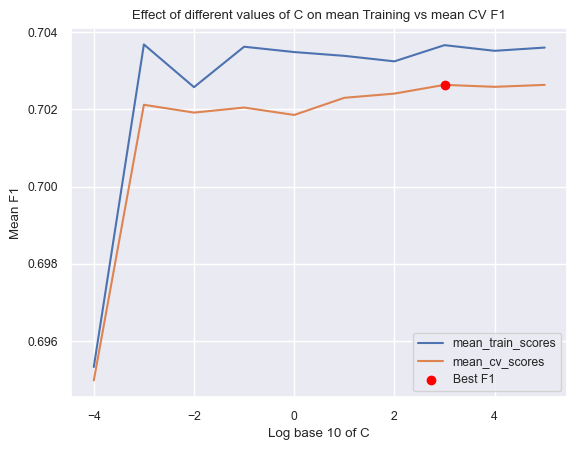

In [25]:
# Dataframe for plotting purposes
lr_plot_df = pd.DataFrame(lr_dict)
lr_plot_df.plot(x = 'logC', y = ['mean_train_scores', 'mean_cv_scores'])

# Using Logarithmic scaling to produce a more informative and clearer visual
plt.xlabel('Log base 10 of C')
plt.ylabel('Mean F1')
plt.title('Effect of different values of C on mean Training vs mean CV F1')

# Adapted from User Max Ghenis https://stackoverflow.com/questions/27779845/how-to-plot-one-single-data-point
best_idx_lr = lr_plot_df["mean_cv_scores"].idxmax()
plt.scatter(lr_plot_df["logC"][best_idx_lr], lr_plot_df["mean_cv_scores"][best_idx_lr],
            color="red", zorder = 5, label="Best F1")
plt.legend()
lr_plot_df

In [26]:
best_C_lr = lr_plot_df["C"][best_idx_lr]

tuned_lr = LogisticRegression(C=best_C_lr, max_iter=5000)
tuned_lr_pipe = make_pipeline(clone(preprocessor), tuned_lr)
results_dict['tuned logistic regression'] = mean_std_f1_scores(tuned_lr_pipe, X_train, y_train, cv=5, return_train_score=True)
results_df = pd.DataFrame(results_dict).T
results_df

,fit_time,score_time,test_score,train_score
dummy,0.00866 (+/- 0.00041),0.00309 (+/- 0.00016),0.43718 (+/- 0.00004),0.43718 (+/- 0.00001)
logistic regression,0.03453 (+/- 0.00133),0.00340 (+/- 0.00012),0.70186 (+/- 0.00667),0.70348 (+/- 0.00147)
tuned logistic regression,0.04028 (+/- 0.00377),0.00363 (+/- 0.00038),0.70263 (+/- 0.00782),0.70366 (+/- 0.00183)


<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 8. Different models
<hr>
rubric={points:12}

<div class="alert alert-info">
    
**Your tasks:**

1. **Experiment with additional models**: Train at least **three models** other than a linear model. Ensure that **at least one** of these models is a **tree-based ensemble model** (e.g., Random Forest, Gradient Boosting, or XGBoost).

2. **Compare and interpret results**: Summarize your findings in terms of **overfitting/underfitting** behavior and **fit/score times** for each model. Reflect on your results. Were you able to **outperform the linear model**?

</div>

<div class="alert alert-warning">
    
Solution_8
    
</div>

_Points:_ 12

- Findings:
    - The Random Forest model had clear overfitting based on the difference of 20% percent between the validation score and the train score
    - The Random Forest model has a fit time of over 100 times greater than that of the logistic regression, however, the score time was relatively similar, only 20 times greater
    - The KNN model had some overfitting based on the high disparity between the validation score and train score of around 10% although it wasn't to the extent of Random Tree, it likely does not generalize super well.
    - The KNN model had a fitting time that was 2-3 times faster than the logistic regression model, however, it was quite slow when scoring at a rate of almost a second, which is more than 100 times slower than logistic regression
    - The SVM with RBF kernel did not overfit nor underfit as both its validation and train scores were within less than a percent away from each other, and thus we can be confident that the model is generalizing well.
    - However, the SVM with RBF kernel had a really slow fitting time of 80 seconds, which is almost 3000x slower than that of the logistic regression, which is a really key factor, especially when it doesn't even perform better, and therefore, there likely isn't much use for this model either.
    - Similarly, the score time was way slower at 6 seconds, which is 900x slower.
- Results:
    - The Random Forest model had a validation score of 0.69896 (+/- 0.00385) and train score 0.99897 (+/- 0.00020).
        - It had a fit time of 3.80791 (+/- 0.06038).
        - It had a score time of 0.05926 (+/- 0.00367).
    - The KNN model had a validation score of 0.64581 (+/- 0.00672) and train score 0.75698 (+/- 0.00288).
        - It had a fit time of 0.01310 (+/- 0.00145).
        - It had a score time of 0.37044 (+/- 0.01720).
    - The SVM with rbf kernel had a validation score of 0.69455 (+/- 0.00656) and train score 0.70869 (+/- 0.00235).
        - It had a fit time of 79.97327 (+/- 1.05716).
        - It had a score time of 2.80053 (+/- 0.09369).
- Were we able to outperform the linear model?
    - None of the three additional models was able to outperform the linear model that we initially made, even before the hyperparameter optimization. The SVM with an RBF kernel performed best, with results around 1% worse, without any clear issues such as overfitting, but had a large fit time. In addition, KNN was 6% off from logistic regression, and although Random Forest was only about half a percent off, it experienced severe overfitting based on how it implements fit().

In [27]:
rf = RandomForestClassifier(random_state=123)
knn = KNeighborsClassifier()
svm = SVC(probability=True)

In [28]:
pipe_rf = make_pipeline(clone(preprocessor), rf)
pipe_knn = make_pipeline(clone(preprocessor), knn)
pipe_svm = make_pipeline(clone(preprocessor), svm)

In [29]:
results_dict['random forest'] = mean_std_f1_scores(pipe_rf, X_train, y_train, cv=5, return_train_score=True, n_jobs=-1)
results_dict['knn'] = mean_std_f1_scores(pipe_knn, X_train, y_train, cv=5, return_train_score=True, n_jobs=-1)
results_dict['svm w/ rbf kernel'] = mean_std_f1_scores(pipe_svm, X_train, y_train, cv=5, return_train_score=True, n_jobs=-1)
results_df = pd.DataFrame(results_dict).T
results_df

,fit_time,score_time,test_score,train_score
dummy,0.00866 (+/- 0.00041),0.00309 (+/- 0.00016),0.43718 (+/- 0.00004),0.43718 (+/- 0.00001)
logistic regression,0.03453 (+/- 0.00133),0.00340 (+/- 0.00012),0.70186 (+/- 0.00667),0.70348 (+/- 0.00147)
tuned logistic regression,0.04028 (+/- 0.00377),0.00363 (+/- 0.00038),0.70263 (+/- 0.00782),0.70366 (+/- 0.00183)
random forest,3.80791 (+/- 0.06038),0.05926 (+/- 0.00367),0.69896 (+/- 0.00385),0.99897 (+/- 0.00020)
knn,0.01310 (+/- 0.00145),0.37044 (+/- 0.01720),0.64581 (+/- 0.00672),0.75698 (+/- 0.00288)
svm w/ rbf kernel,79.97327 (+/- 1.05716),2.80053 (+/- 0.09369),0.69466 (+/- 0.00654),0.70862 (+/- 0.00227)


<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 9. Feature selection 
<hr>
rubric={points:2}

<div class="alert alert-info">
    
**Your tasks:**

1. **Perform feature selection**: Attempt to select relevant features using methods such as `RFECV` or forward selection.

2. **Evaluate the impact** Compare the model performance before and after feature selection. Do the results improve with feature selection?

3. **Summarize findings** Summarize your observations and decide whether to **keep feature selection** in your pipeline.  If it improves results, retain it for the next exercises; otherwise, you may choose to omit it.
</div>

<div class="alert alert-warning">
    
Solution_9
    
</div>

_Points:_ 2

- Observations:
    - Biggest observation is the increase in fitting time for all models (e.g. random forest, knn) except for the SVM
    - Scoring time decreased for Random Forest SVM, and KNN, and ony increased for logistic regression but no where near the scale of the change of fitting time
    - The model with the most absurd increase in fitting time is knn, which is due to the fact that we had to use rfecv, and nest that pipeline in 5 cross validation folds
    - All train F1 score values decreased, and all validation F1 score values decreased except that of KNN which only marginally increased. 
- Did feature selection end up improving our results?
    - Overall, feature selection did end up improving all our models (increased cv score, reduced train score). Instead it decrease the F1 score of all the models except the SVM with rbf kernel, similarly to what happend to fit time That being said, it exponentially increased the fit time of some of the models, so the computational cost tradeoff is not be worth the given the deteriation of generalization. So, with that in mind, we are deciding to drop the feature selected pipelines moving forward with the exercises, except for SVM which got noticeble improvement in fitting time.

In [30]:
# Using SelectFromModel for the linear and tree based models, for faster computation
sfm_lr = SelectFromModel(tuned_lr, threshold='median')
sfm_rf = SelectFromModel(rf, threshold='median')

# Using a 'mock' estimator for f1 threshold optimization
estimator = LogisticRegression(max_iter=2000)
estimator_pipe = make_pipeline(clone(preprocessor), estimator)
estimator_pipe_threshold = optimize_f1_threshold(estimator_pipe)
estimator_scorer = f1_thresholded_scorer(estimator_pipe_threshold)

# Using stratifiedkfold and optimizing for f1 score due to class imbalance
# Choosing 5 cross validation folds due to the size of the dataset (reduce computation cost)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=123)
rfecv_selector = RFECV(estimator=LogisticRegression(max_iter=2000), cv=cv, scoring=estimator_scorer, n_jobs=-1)

In [31]:
sfm_lr_pipe = make_pipeline(clone(preprocessor), sfm_lr, clone(tuned_lr))
sfm_rf_pipe = make_pipeline(clone(preprocessor), sfm_rf, clone(rf))
rfe_knn_pipe = make_pipeline(clone(preprocessor), rfecv_selector, clone(knn))
rfe_svm_pipe = make_pipeline(clone(preprocessor), rfecv_selector, clone(svm))

In [32]:
results_dict['selection tuned logistic regression'] = mean_std_f1_scores(sfm_lr_pipe, X_train, y_train, cv=5, return_train_score=True, n_jobs=-1)
results_dict['selection random forest'] = mean_std_f1_scores(sfm_rf_pipe, X_train, y_train, cv=5, return_train_score=True, n_jobs=-1)
results_dict['selection knn'] = mean_std_f1_scores(rfe_knn_pipe, X_train, y_train, cv=5, return_train_score=True)
results_dict['selection svm w/ rbf kernel'] = mean_std_f1_scores(rfe_svm_pipe, X_train, y_train, cv=5, return_train_score=True)
results_df = pd.DataFrame(results_dict).T
results_df

,fit_time,score_time,test_score,train_score
dummy,0.00866 (+/- 0.00041),0.00309 (+/- 0.00016),0.43718 (+/- 0.00004),0.43718 (+/- 0.00001)
logistic regression,0.03453 (+/- 0.00133),0.00340 (+/- 0.00012),0.70186 (+/- 0.00667),0.70348 (+/- 0.00147)
tuned logistic regression,0.04028 (+/- 0.00377),0.00363 (+/- 0.00038),0.70263 (+/- 0.00782),0.70366 (+/- 0.00183)
random forest,3.80791 (+/- 0.06038),0.05926 (+/- 0.00367),0.69896 (+/- 0.00385),0.99897 (+/- 0.00020)
knn,0.01310 (+/- 0.00145),0.37044 (+/- 0.01720),0.64581 (+/- 0.00672),0.75698 (+/- 0.00288)
svm w/ rbf kernel,79.97327 (+/- 1.05716),2.80053 (+/- 0.09369),0.69466 (+/- 0.00654),0.70862 (+/- 0.00227)
selection tuned logistic regression,0.10155 (+/- 0.01582),0.00579 (+/- 0.00108),0.69378 (+/- 0.00726),0.69624 (+/- 0.00252)
selection random forest,9.44387 (+/- 0.13066),0.07711 (+/- 0.01508),0.69626 (+/- 0.01011),0.99646 (+/- 0.00035)
selection knn,2.00021 (+/- 0.17964),0.05840 (+/- 0.01137),0.64366 (+/- 0.00701),0.75558 (+/- 0.00445)
selection svm w/ rbf kernel,33.27693 (+/- 2.81904),1.57432 (+/- 0.17705),0.69556 (+/- 0.00760),0.70457 (+/- 0.00221)


<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 10. Hyperparameter optimization
<hr>
rubric={points:10}

<div class="alert alert-info">
    
**Your tasks:**

1. **Optimize hyperparameters**: Attempt to optimize hyperparameters for the models you have tried so far. In at least **one case**, tune **multiple hyperparameters** for a single model.

2. **Use suitable optimization methods**: You may use any of the following approaches for hyperparameter optimization:
   - [`GridSearchCV`](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)  
   - [`RandomizedSearchCV`](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html)  
   - [Bayesian optimization with scikit-optimize](https://github.com/scikit-optimize/scikit-optimize)

3. **Summarize your results**: Report and compare the optimized results across models. Discuss whether hyperparameter optimization led to performance improvements.

</div>

<div class="alert alert-warning">
    
Solution_10
    
</div>

_Points:_ 10

- Results:
    - Tuned Random Forest vs. Default:
        - CV F1 score: 0.71167 (+/- 0.00855) vs. 0.69896 (+/- 0.00385)
        - Train F1 score: 0.89580 (+/- 0.00448) vs. 0.99897 (+/- 0.00020)
    - Tuned KNN vs. Default:
        - CV F1 score: 0.68715 (+/- 0.00706) vs. 0.64581 (+/- 0.00672)
        - Train F1 score: 0.71978 (+/- 0.00201) vs. 0.75698 (+/- 0.00288)
    - Tuned SVM vs. Default:
        - CV F1 score: 0.69514 (+/- 0.01142) vs. 0.69466 (+/- 0.00654)
        - Train F1 score: 0.69550 (+/- 0.00552) vs. 0.70866 (+/- 0.00241)
- Did the optimization lead to performance improvements?
    - Tuned Random Forest vs. Default:
        - With the hyperparameter tuning on the random forest classifier, we see that the model not only increased its mean CV F1 score by roughly 0.02, but it also drastically reduced the overfitting of the model (i.e. the gap between the train F1 and the CV F1 is much smaller). So yes, the performance of the model certainly improved.
        - The model is now has the best validation F1 score.
        - That being said, the fit_time did increase by approximately a factor of 3.
    - Tuned KNN vs. Default:
        - With the hyperparameter tuning on the knn classifier, we see that the model not only increase its mean CV F1 score by roughly 0.04, but it also decrease the overfitting of the model (by roughly 0.035). So, yes, the performance of the model did improve.
        - That being said, the fit_time increased exponentially, it is now increased by a factor of approximately 140. So, with that in mind, the increase in performance may not be worth the additional time for computation.
    - Tuned SVM vs. Default:
        - With the hyperparameter tuning on the svm with rbf kernel classifier, we see that the model actually decreased in mean CV F1 score (~0.001), but it did decrease the overfitting of the model (~0.01). So, overall, I would count that as an improvement.
        - That being said, the fit time did decrease (dependent on how fast your computer is), so, due to the fact that the model got better at generalizing, didn't lose much mean F1 score, and got faster, we decided to move forward with that pipeline.


In [33]:
param_grid_rf = {
    'randomforestclassifier__n_estimators': np.arange(100, 600, 100),
    'randomforestclassifier__max_depth': np.arange(5, 30, 5),
}

pipe_rf_threshold = optimize_f1_threshold(pipe_rf)
pipe_rf_scorer = f1_thresholded_scorer(pipe_rf_threshold)
random_search_rf = RandomizedSearchCV(clone(pipe_rf),
                                      param_distributions = param_grid_rf,
                                      n_iter=16,
                                      n_jobs=-1,
                                      return_train_score=True,
                                      scoring=pipe_rf_scorer)

random_search_rf.fit(X_train, y_train)

,estimator,Pipeline(step..._state=123))])
,param_distributions,"{'randomforestclassifier__max_depth': array([ 5, 10, 15, 20, 25]), 'randomforestclassifier__n_estimators': array([100, 2...00, 400, 500])}"
,n_iter,16
,scoring,<function f1_...t 0x15b065620>
,n_jobs,-1
,refit,True
,cv,None
,verbose,0
,pre_dispatch,'2*n_jobs'
,random_state,None
,error_score,nan


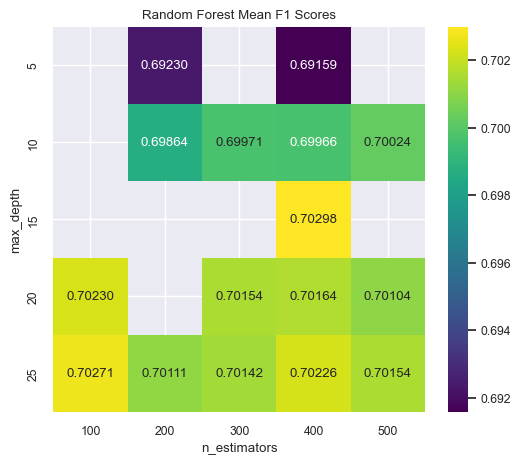

In [34]:
# Adapted from lecture 8
results_rf = pd.DataFrame(random_search_rf.cv_results_)

# Create a pivot table with actual parameter values
scores_rf = results_rf.pivot_table(
    index='param_randomforestclassifier__max_depth',
    columns='param_randomforestclassifier__n_estimators',
    values='mean_test_score'
)

# Plot heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(scores_rf, annot=True, fmt=".5f", cmap="viridis")
plt.xlabel("n_estimators")
plt.ylabel("max_depth")
plt.title("Random Forest Mean F1 Scores")
plt.show()

In [35]:
random_search_rf.best_params_

tuned_rf_pipe = random_search_rf.best_estimator_
results_dict['tuned random forest'] = mean_std_f1_scores(tuned_rf_pipe, X_train, y_train, cv=5, return_train_score=True, n_jobs=-1)
results_df = pd.DataFrame(results_dict).T
results_df

,fit_time,score_time,test_score,train_score
dummy,0.00866 (+/- 0.00041),0.00309 (+/- 0.00016),0.43718 (+/- 0.00004),0.43718 (+/- 0.00001)
logistic regression,0.03453 (+/- 0.00133),0.00340 (+/- 0.00012),0.70186 (+/- 0.00667),0.70348 (+/- 0.00147)
tuned logistic regression,0.04028 (+/- 0.00377),0.00363 (+/- 0.00038),0.70263 (+/- 0.00782),0.70366 (+/- 0.00183)
random forest,3.80791 (+/- 0.06038),0.05926 (+/- 0.00367),0.69896 (+/- 0.00385),0.99897 (+/- 0.00020)
knn,0.01310 (+/- 0.00145),0.37044 (+/- 0.01720),0.64581 (+/- 0.00672),0.75698 (+/- 0.00288)
svm w/ rbf kernel,79.97327 (+/- 1.05716),2.80053 (+/- 0.09369),0.69466 (+/- 0.00654),0.70862 (+/- 0.00227)
selection tuned logistic regression,0.10155 (+/- 0.01582),0.00579 (+/- 0.00108),0.69378 (+/- 0.00726),0.69624 (+/- 0.00252)
selection random forest,9.44387 (+/- 0.13066),0.07711 (+/- 0.01508),0.69626 (+/- 0.01011),0.99646 (+/- 0.00035)
selection knn,2.00021 (+/- 0.17964),0.05840 (+/- 0.01137),0.64366 (+/- 0.00701),0.75558 (+/- 0.00445)
selection svm w/ rbf kernel,33.27693 (+/- 2.81904),1.57432 (+/- 0.17705),0.69556 (+/- 0.00760),0.70457 (+/- 0.00221)


In [36]:
knn_dict = {
    "n_neighbors": np.arange(5, 16, 1),
    "mean_train_scores": list(),
    "mean_cv_scores": list(),
}
knn_results_dict = {}
for n in knn_dict['n_neighbors']:
    trial_knn = KNeighborsClassifier(n_neighbors=n)
    pipe_trial_knn = make_pipeline(clone(preprocessor), trial_knn)
    knn_results_dict[f'n_neighbors = {n}'] = mean_std_f1_scores(pipe_trial_knn, X_train, y_train, cv=5, return_train_score=True, n_jobs=-1)

    pipe_trial_knn_threshold = optimize_f1_threshold(pipe_trial_knn)
    pipe_trial_knn_scorer = f1_thresholded_scorer(pipe_trial_knn_threshold)
    scores_knn = cross_validate(pipe_trial_knn, X_train, y_train, cv=5, return_train_score=True, scoring=pipe_trial_knn_scorer, n_jobs=-1)
    knn_dict["mean_train_scores"].append(scores_knn["train_score"].mean())
    knn_dict["mean_cv_scores"].append(scores_knn["test_score"].mean())

knn_results_df = pd.DataFrame(knn_results_dict).T
knn_results_df

,fit_time,score_time,test_score,train_score
n_neighbors = 5,0.01465 (+/- 0.00078),0.46011 (+/- 0.00961),0.64581 (+/- 0.00672),0.75698 (+/- 0.00288)
n_neighbors = 6,0.01464 (+/- 0.00542),0.42425 (+/- 0.01558),0.66761 (+/- 0.00441),0.74796 (+/- 0.00196)
n_neighbors = 7,0.01517 (+/- 0.00394),0.43147 (+/- 0.01656),0.67028 (+/- 0.00589),0.74700 (+/- 0.00152)
n_neighbors = 8,0.01400 (+/- 0.00328),0.42858 (+/- 0.01723),0.66351 (+/- 0.00756),0.73828 (+/- 0.00173)
n_neighbors = 9,0.01992 (+/- 0.00535),0.61067 (+/- 0.01289),0.67663 (+/- 0.00617),0.73401 (+/- 0.00230)
n_neighbors = 10,0.01591 (+/- 0.00377),0.56689 (+/- 0.01706),0.67995 (+/- 0.00651),0.73358 (+/- 0.00307)
n_neighbors = 11,0.01737 (+/- 0.00223),0.57574 (+/- 0.00981),0.67789 (+/- 0.00618),0.72354 (+/- 0.00193)
n_neighbors = 12,0.01732 (+/- 0.00459),0.54213 (+/- 0.02422),0.68183 (+/- 0.00933),0.72436 (+/- 0.00207)
n_neighbors = 13,0.01528 (+/- 0.00243),0.54900 (+/- 0.01848),0.68338 (+/- 0.00964),0.72486 (+/- 0.00242)
n_neighbors = 14,0.01614 (+/- 0.00121),0.54301 (+/- 0.01569),0.68379 (+/- 0.00904),0.71820 (+/- 0.00233)


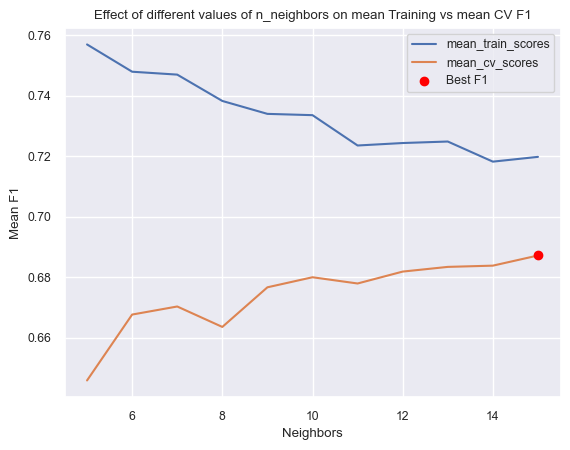

In [37]:
knn_plot_df = pd.DataFrame(knn_dict)
knn_plot_df.plot(x='n_neighbors', y=['mean_train_scores', 'mean_cv_scores'])

plt.xlabel('Neighbors')
plt.ylabel('Mean F1')
plt.title('Effect of different values of n_neighbors on mean Training vs mean CV F1')

best_idx_knn = knn_plot_df['mean_cv_scores'].idxmax()
plt.scatter(knn_plot_df['n_neighbors'][best_idx_knn], knn_plot_df['mean_cv_scores'][best_idx_knn],
            color="red", zorder = 5, label="Best F1")
plt.legend()

In [38]:
best_n_neighbors = knn_plot_df['n_neighbors'][best_idx_knn]

tuned_knn = KNeighborsClassifier(n_neighbors=best_n_neighbors)
tuned_knn_pipe = make_pipeline(clone(preprocessor), tuned_knn)
results_dict['tuned knn'] = mean_std_f1_scores(tuned_knn_pipe, X_train, y_train, cv=5, return_train_score=True, n_jobs=-1)
results_df = pd.DataFrame(results_dict).T
results_df

,fit_time,score_time,test_score,train_score
dummy,0.00866 (+/- 0.00041),0.00309 (+/- 0.00016),0.43718 (+/- 0.00004),0.43718 (+/- 0.00001)
logistic regression,0.03453 (+/- 0.00133),0.00340 (+/- 0.00012),0.70186 (+/- 0.00667),0.70348 (+/- 0.00147)
tuned logistic regression,0.04028 (+/- 0.00377),0.00363 (+/- 0.00038),0.70263 (+/- 0.00782),0.70366 (+/- 0.00183)
random forest,3.80791 (+/- 0.06038),0.05926 (+/- 0.00367),0.69896 (+/- 0.00385),0.99897 (+/- 0.00020)
knn,0.01310 (+/- 0.00145),0.37044 (+/- 0.01720),0.64581 (+/- 0.00672),0.75698 (+/- 0.00288)
svm w/ rbf kernel,79.97327 (+/- 1.05716),2.80053 (+/- 0.09369),0.69466 (+/- 0.00654),0.70862 (+/- 0.00227)
selection tuned logistic regression,0.10155 (+/- 0.01582),0.00579 (+/- 0.00108),0.69378 (+/- 0.00726),0.69624 (+/- 0.00252)
selection random forest,9.44387 (+/- 0.13066),0.07711 (+/- 0.01508),0.69626 (+/- 0.01011),0.99646 (+/- 0.00035)
selection knn,2.00021 (+/- 0.17964),0.05840 (+/- 0.01137),0.64366 (+/- 0.00701),0.75558 (+/- 0.00445)
selection svm w/ rbf kernel,33.27693 (+/- 2.81904),1.57432 (+/- 0.17705),0.69556 (+/- 0.00760),0.70457 (+/- 0.00221)


In [39]:
param_grid_svm = {
    'svc__gamma': 10.0**np.arange(-3, 3, 1),
    'svc__C': 10.0**np.arange(-3, 3, 1),
}

# Using HalvingGridSearchCV to save on computation (mostly time)
pipe_svm_threshold = optimize_f1_threshold(rfe_svm_pipe)
pipe_svm_scorer = f1_thresholded_scorer(pipe_svm_threshold)
halving_search_svm = HalvingGridSearchCV(clone(rfe_svm_pipe),
                                        param_grid = param_grid_svm,
                                        n_jobs=-1,
                                        random_state=123,
                                        return_train_score=True,
                                        scoring=pipe_svm_scorer)

halving_search_svm.fit(X_train, y_train)

,estimator,Pipeline(step...ility=True))])
,param_grid,"{'svc__C': array([1.e-03...e+01, 1.e+02]), 'svc__gamma': array([1.e-03...e+01, 1.e+02])}"
,factor,3
,resource,'n_samples'
,max_resources,'auto'
,min_resources,'exhaust'
,aggressive_elimination,False
,cv,5
,scoring,<function f1_...t 0x14ff03e20>
,refit,True
,error_score,nan


In [40]:
results_svm = pd.DataFrame(halving_search_svm.cv_results_)
halving_search_svm.best_params_

{'svc__C': np.float64(1.0), 'svc__gamma': np.float64(0.001)}

In [41]:
tuned_svm_pipe = halving_search_svm.best_estimator_
results_dict['tuned svm w/ rbf kernel'] = mean_std_f1_scores(tuned_svm_pipe, X_train, y_train, cv=5, return_train_score=True, n_jobs=-1)
results_df = pd.DataFrame(results_dict).T
results_df

,fit_time,score_time,test_score,train_score
dummy,0.00866 (+/- 0.00041),0.00309 (+/- 0.00016),0.43718 (+/- 0.00004),0.43718 (+/- 0.00001)
logistic regression,0.03453 (+/- 0.00133),0.00340 (+/- 0.00012),0.70186 (+/- 0.00667),0.70348 (+/- 0.00147)
tuned logistic regression,0.04028 (+/- 0.00377),0.00363 (+/- 0.00038),0.70263 (+/- 0.00782),0.70366 (+/- 0.00183)
random forest,3.80791 (+/- 0.06038),0.05926 (+/- 0.00367),0.69896 (+/- 0.00385),0.99897 (+/- 0.00020)
knn,0.01310 (+/- 0.00145),0.37044 (+/- 0.01720),0.64581 (+/- 0.00672),0.75698 (+/- 0.00288)
svm w/ rbf kernel,79.97327 (+/- 1.05716),2.80053 (+/- 0.09369),0.69466 (+/- 0.00654),0.70862 (+/- 0.00227)
selection tuned logistic regression,0.10155 (+/- 0.01582),0.00579 (+/- 0.00108),0.69378 (+/- 0.00726),0.69624 (+/- 0.00252)
selection random forest,9.44387 (+/- 0.13066),0.07711 (+/- 0.01508),0.69626 (+/- 0.01011),0.99646 (+/- 0.00035)
selection knn,2.00021 (+/- 0.17964),0.05840 (+/- 0.01137),0.64366 (+/- 0.00701),0.75558 (+/- 0.00445)
selection svm w/ rbf kernel,33.27693 (+/- 2.81904),1.57432 (+/- 0.17705),0.69556 (+/- 0.00760),0.70457 (+/- 0.00221)


<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 11. Interpretation and feature importances
<hr>
rubric={points:10}

<div class="alert alert-info">
    
**Your tasks:**

1. **Interpret model feature importance**: Use one of the interpretation methods discussed in class (e.g., `shap`), or another suitable method of your choice, to examine the most important features of one of your **non-linear models**.

2. **Summarize insights**: Summarize your observations about which features contribute most to the model's predictions and how they influence the outcomes.

   
</div>

<div class="alert alert-warning">
    
Solution_11
    
</div>

_Points:_ 10

- Observations:
    - Features that influence the model's predictions the most:
        - Overall, looking at the waterfall plot, we can see that a vast majority of the model's prediction confidence lies in the PAY_# features. Based on the two randomly selected samples, we can see that the tuned random forest classifier emphasizes PAY_0 and PAY_2 heavily for whether or not a person will default their payment the following month. This would presumably be due to the snowballing effect of not paying their bill on time. The rest of the PAY_# features then contribute roughly the same amount to the prediction. 
        - The rest of the features seem to be pretty negligible in the grand scheme of things. However, when summed up, they do provide a bit of influence.
    - Other remarks:
        - In both samples, we can see that there are some features that go against the final prediction. In the defaulting case, we see that the paid amount in select months (2 & 5 in this case), make it 'less likely' that they are going to default next month, but it is still dominated by the PAY_# feature_importance_. In the not defaulting case, we see that the credit limit of the individual (likely on the lower end, as per the histogram in the EDA), makes it 'more likely' that the they are default next month. But again, that is dominated by PAY_# feature_importance_.

In [42]:
# Adapted from lecture 12
X_train_enc = pd.DataFrame(
    data=clone_preprocessor.transform(X_train).tolist(),
    columns=clone_preprocessor.get_feature_names_out(),
    index=X_train.index,
)

In [43]:
# Adapted from lecture 12
X_test_enc = pd.DataFrame(
    data=clone_preprocessor.transform(X_test).tolist(),
    columns=clone_preprocessor.get_feature_names_out(),
    index=X_test.index,
)
X_test_enc.shape

(9000, 40)

In [44]:
model = clone(tuned_rf_pipe.named_steps['randomforestclassifier'])
model.fit(X_train_enc, y_train)

,n_estimators,np.int64(400)
,criterion,'gini'
,max_depth,np.int64(15)
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [45]:
explainer = shap.TreeExplainer(model) # define the shap explainer 
train_shap_values = explainer(X_train_enc) # train shap values
test_shap_values = explainer(X_test_enc) # test shap values 

In [46]:
train_shap_values.shape
test_shap_values.shape

(9000, 40, 2)

In [47]:
shap.initjs()

In [48]:
ex1_idx = 10
ex2_idx = 68

In [49]:
X_test_enc.iloc[ex1_idx]
y_test.iloc[ex1_idx]

np.int64(1)

In [50]:
model.predict(X_test_enc)[ex1_idx]

np.int64(1)

In [51]:
model.predict_proba(X_test_enc)[ex1_idx]

array([0.2936132, 0.7063868])

In [52]:
X_test_enc.iloc[ex2_idx]
y_test.iloc[ex2_idx]

np.int64(0)

In [53]:
model.predict(X_test_enc)[ex2_idx]

np.int64(0)

In [54]:
model.predict_proba(X_test_enc)[ex2_idx]

array([0.91030299, 0.08969701])

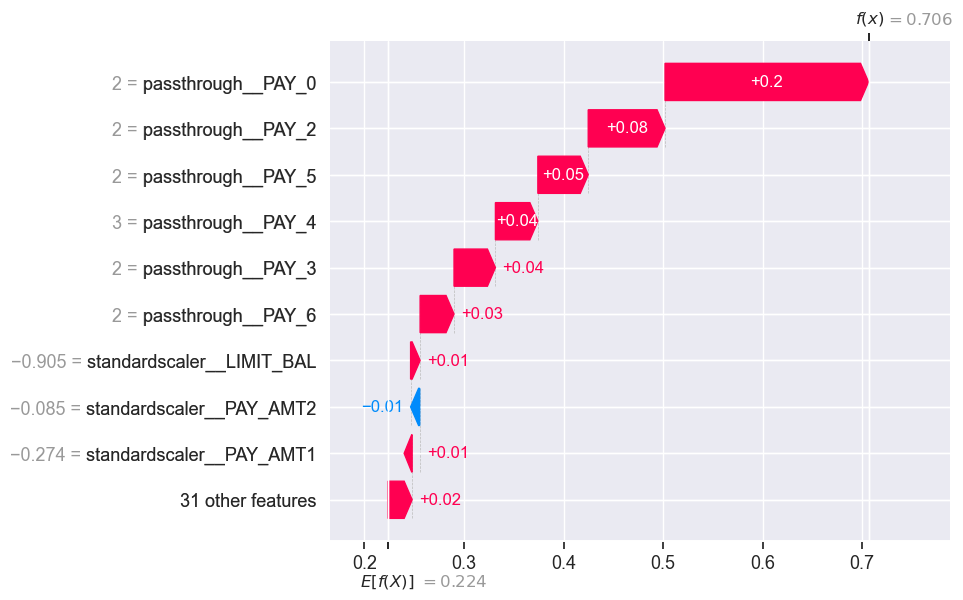

In [55]:
test_samples = test_shap_values[:,:, 1]
shap.plots.waterfall(test_samples[ex1_idx])

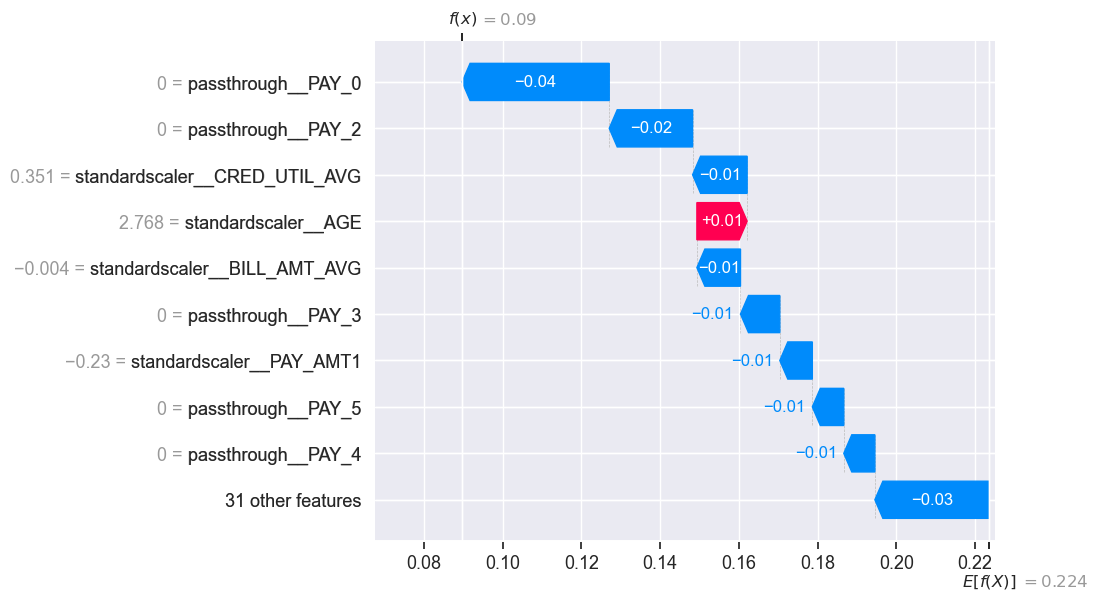

In [56]:
shap.plots.waterfall(test_samples[ex2_idx])

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 12. Results on the test set
<hr>

rubric={points:10}

<div class="alert alert-info">
    
**Your tasks:**

1. **Evaluate on the test set**: Apply your best-performing model to the test data and report the test scores.

2. **Compare and reflect**: Compare the **test scores** with the **validation scores** from previous experiments. Discuss the consistency between them. How much do you **trust your results**? Reflect on whether you might have encountered **optimization bias**.

3. **Explain individual predictions**: Select one or two examples from your test predictions and use an interpretation method (e.g., **SHAP force plots**) to explain these individual predictions.
</div>

<div class="alert alert-warning">
    
Solution_12
    
</div>

_Points:_ 10

- Test Scores vs. Validation Scores:
    - Dummy:
        - 0.439322 vs. 0.43718 (+/- 0.00004)
    - Logistic Regression:
        - 0.694786 vs. 0.70186 (+/- 0.00667)
    - Tuned Logistic Regression:
        - 0.694704 vs. 0.70263 (+/- 0.00782)
    - Random Forest:
        - 0.690216 vs. 0.69896 (+/- 0.00385)
    - KNN:
        - 0.640217 vs. 0.64581 (+/- 0.00672)
    - SVM RBF:
        - 0.691991 vs. 0.69466 (+/- 0.00654)
    - Selection Tuned Logistic Regression:
        - 0.687663 vs. 0.69378 (+/- 0.00726)
    - Selection Random Forest:
        - 0.688565 vs. 0.69626 (+/- 0.01011)
    - Selection KNN:
        - 0.639967 vs. 0.64366 (+/- 0.00701)
    - Selection SVM RBF:
        - 0.691474 vs. 0.69556 (+/- 0.00760)	
    - Tuned Random Forest:
        - 0.696063 vs. 0.71167 (+/- 0.00855)
    - Tuned KNN:
        - 0.679054 vs. 0.68715 (+/- 0.00706)
    - Tuned SVM RBF:
        - 0.688859 vs. 0.69514 (+/- 0.01142)
    
    - Observations:
        - Comparing the test F1 score and mean CV F1 scores show above from each of the models that we experimented with, we can see that the difference between the predicted score (i.e. the mean CV F1 score), and the actual score (the test F1 score) was no greater than 0.003 for all models. This means that our mean CV F1 score for each of the models was very much an accurate benchmark for our model performance/ability to generalize.

- Best Model: Logistic Regression (default)
    - Note: tuned random forest exhibited the highest test F1 score in the end, but it is significantly more overfit and slow compared to logistic regression (default)
    - Test F1 Score: 0.694786
    - This is interesting seeing as the mean CV F1 score for the tuned version of LogisticRegression was higher than that of the default version. However, the fact that the increase in mean CV F1 score was so small, and the train F1 score increased (more overfit), the mean CV F1 scores were not an accurate benchmark for which one would generalize better. And in this case, the default model ended up generalizing better.

- How much do we trust our results? Did we encounter optimization bias?
    - As mentioned in the observations under the Test Scores vs. Validation Scores section, seeing as the mean CV F1 scores and the actual test F1 scores matched up very well for each of our models, it would be reasonable for us to trust the results. And seeing as our mean CV F1 scores were not overly optimistic, it would be reasonable to say that we did not encounter optimization bias (although, one could technically argue that the tuned logistic regression model experienced a bit of optimization bias, but overall the gap between the mean CV and test isn't large enough to explicitly say so).
    
- Individual prediction explanations:
    - We used SHAP force plots to visualize two arbitrary test predictions (with index test_point_1_idx, and test_point_2_idx)
        - The prediction with index test_point_1_idx is an example of someone whom we expect to not default next month.
            - They ended up not defaulting next month, so that was an accurate prediction.
            - This can be explained by the color representation on the shap force plot, as well as how the shap prediction is actually calculated
            - This forceplot exhibits a lot of blue (which is associated with not defaulting)
                - We can see that their recent payment behaviour has been good (PAY_0 = PAY_2 = 0)
                - We can see that their credit utilization and their bill amount tend to be very low (bill amt even tends to be negative)
            - f(x) in this case, represents the probability that this sample is labeled the positive class. And seeing as it is 0.06, we can see that the model is very confident about it's prediction. f(x) is then calculated using the base value (0.2236) adding that to the sum of all shap values. So, when there is an overwhelming amount of blue (i.e. negative values) in the sum of shap values, that will lower the probability of it predicting the positive class, hence our result.

        - The prediction with index test_point_2_idx is an example of someone whom we expect to not default as well, but ends up being a misclassification
            - They ended up defaulting the following month.
            - The miss classification is likely due to the fact that the plot exhibits almost equal amounts of red and blue (feature values that are correlated with the positive class, as well as feature values that are correlated with the negative class).
            - And seeing as forceplots are like a tug of war, if all the shap values essentially cancel out, the f(x) will only be dependant on the base value more or less. And seeing as the base value (average output probability for the positive class) favours not defaulting, that is what our result ended up being. This result likely could have come about due to the class imbalance present in the dataset (more people are likely to not default than to default)

In [57]:
test_dict = {
    'Models': ['dummy', 'logistic regression', 'tuned logistic regression', 'random forest', 'knn', 'svm rbf', 'selection logistic regression', 'selection random forest', 'selection knn', 'selection svm rbf', 'tuned random forest', 'tuned knn', 'tuned svm rbf'],
    'test_score': list(),
} 
results_df

,fit_time,score_time,test_score,train_score
dummy,0.00866 (+/- 0.00041),0.00309 (+/- 0.00016),0.43718 (+/- 0.00004),0.43718 (+/- 0.00001)
logistic regression,0.03453 (+/- 0.00133),0.00340 (+/- 0.00012),0.70186 (+/- 0.00667),0.70348 (+/- 0.00147)
tuned logistic regression,0.04028 (+/- 0.00377),0.00363 (+/- 0.00038),0.70263 (+/- 0.00782),0.70366 (+/- 0.00183)
random forest,3.80791 (+/- 0.06038),0.05926 (+/- 0.00367),0.69896 (+/- 0.00385),0.99897 (+/- 0.00020)
knn,0.01310 (+/- 0.00145),0.37044 (+/- 0.01720),0.64581 (+/- 0.00672),0.75698 (+/- 0.00288)
svm w/ rbf kernel,79.97327 (+/- 1.05716),2.80053 (+/- 0.09369),0.69466 (+/- 0.00654),0.70862 (+/- 0.00227)
selection tuned logistic regression,0.10155 (+/- 0.01582),0.00579 (+/- 0.00108),0.69378 (+/- 0.00726),0.69624 (+/- 0.00252)
selection random forest,9.44387 (+/- 0.13066),0.07711 (+/- 0.01508),0.69626 (+/- 0.01011),0.99646 (+/- 0.00035)
selection knn,2.00021 (+/- 0.17964),0.05840 (+/- 0.01137),0.64366 (+/- 0.00701),0.75558 (+/- 0.00445)
selection svm w/ rbf kernel,33.27693 (+/- 2.81904),1.57432 (+/- 0.17705),0.69556 (+/- 0.00760),0.70457 (+/- 0.00221)


In [58]:
models_1 = [pipe_dummy, pipe_lr, tuned_lr_pipe, pipe_rf, pipe_knn, pipe_svm]
for model in models_1:
    y_test_pred = (model.predict_proba(X_test)[:, 1] >= model.best_threshold_).astype(int)
    test_dict['test_score'].append(f1_score(y_test, y_test_pred, average='macro'))

In [59]:
models_2 = [sfm_lr_pipe, sfm_rf_pipe, rfe_knn_pipe, rfe_svm_pipe]
for model in models_2:
    y_test_pred = (model.predict_proba(X_test)[:, 1] >= model.best_threshold_).astype(int)
    test_dict['test_score'].append(f1_score(y_test, y_test_pred, average='macro'))

In [60]:
models_3 = [tuned_rf_pipe, tuned_knn_pipe, tuned_svm_pipe]
for model in models_3:
    y_test_pred = (model.predict_proba(X_test)[:, 1] >= model.best_threshold_).astype(int)
    test_dict['test_score'].append(f1_score(y_test, y_test_pred, average='macro'))

In [61]:
test_results_df = pd.DataFrame(test_dict)
test_results_df

,Models,test_score
0,dummy,0.439322
1,logistic regression,0.694786
2,tuned logistic regression,0.694704
3,random forest,0.690216
4,knn,0.640217
5,svm rbf,0.691991
6,selection logistic regression,0.687663
7,selection random forest,0.688565
8,selection knn,0.639967
9,selection svm rbf,0.691474


In [62]:
best_model_idx = test_results_df['test_score'].idxmax()
best_model = test_dict['Models'][best_model_idx]
best_model

'tuned random forest'

In [63]:
test_point_1_idx = 177
y_test.iloc[test_point_1_idx]

np.int64(0)

In [64]:
model.predict(X_test.iloc[[test_point_1_idx]])

array([0])

In [65]:
# Adapted from lecture 12
shap.force_plot(test_samples[test_point_1_idx])

In [66]:
test_point_2_idx = 270
y_test.iloc[test_point_2_idx]

np.int64(1)

In [67]:
model.predict(X_test.iloc[[test_point_2_idx]])

array([0])

In [68]:
shap.force_plot(test_samples[test_point_2_idx])

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 13. Summary of results
<hr>
rubric={points:12}

Imagine you are preparing to present the summary of your results to your boss and co-workers.

<div class="alert alert-info">
    
**Your tasks:**

1. **Summarize key results**: Create a clear and concise table highlighting your most important results (e.g., models compared, validation/test scores, key observations).

2. **Write concluding remarks**: Summarize your main takeaways from the project, including what worked well and what did not.

3. **Propose future improvements**: Discuss ideas or approaches you did not try but that could potentially improve **performance** or **interpretability**.

4. **Report final results**: Report your **final test score** and the **metric** you used.

</div>


<div class="alert alert-warning">
    
Solution_13
    
</div>

_Points:_ 12

Key Results:

To summarize our results comparing all test scores, we selected the model from the base, feature-selected, and tuned models that performed best on the test set, while considering factors such as fit and score time.


| Best Models | Validation F1 (macro) | Test F1 (macro) | Fit Time (s) | Score Time (s)| Key Observations |
| ----------- | --------------------  | --------------  | -----------  | ------------- | ---------------- |
| Logistic Regression (base)| 0.70186 (+/- 0.00667) |0.694786 |0.03453 (+/- 0.00133) | 0.00340 (+/- 0.00012) | Baseline model, and had the highest test score, optimization only led to optimization bias or decrease model preformance |
| Random Forest (tuned) | 0.71167 (+/- 0.00855) | 0.696063 | 17.77080 (+/- 0.12357) | 0.20333 (+/- 0.01036) |Strong performance, however high overfitting observed in spite of the improvement through hyperparameter optimization. Feature selection was negligible.|
| KNN (tuned)| 0.68715 (+/- 0.00706) | 0.679054 | 0.01709 (+/- 0.00263) | 0.61628 (+/- 0.01877) | A 3%, model improvement when tuning the hyperparamters,  fast fit time, mediocre scoring time. However, poor F1 performace when in comparison to the rest of the models.|
| SVM (RBF kernel) (selection) | 0.69556 (+/- 0.00760) | 0.691474 | 33.27693 (+/- 2.81904) | 1.57432 (+/- 0.17705)	 |Competitive F1 score, but computationally expensive. Feauture selection model was chosen due to faster fit time with only a small detiriotion of test score.|


Concluding Remarks:

In this project, we sought to develop a model that could predict whether a credit card client would default. We achieved the best test F1 score of 0.695 with a basic logistic regression model when considering other factors such as fit time and overfitting that are present within tuned random forest model. We were surprised that this model performed best, but it is likely due to the linear pattern in the data for whether a client will default. Since the relationship was linear, complex models often overfit to noise and fail to capture the core behavioural trend. This can be illustrated by the example that if a client has been missing payments(`PAY_#`) and continues to do so, they will eventually default, as observed within our feature importance section. In addition, we can attribute the success of the linear model to the feature engineering we accomplished to prevent multicollinearity during exploratory data analysis. In conclusion, an F1 score of 0.695 is exceptional for this project, given the clear class imbalance and our ability to balance precision and recall. In a bank setting, high precision and recall are crucial to avoid granting credit to users who may barely repay. A model that identifies around 70% of defaulters on average would help the bank be more confident in its clients, even if 30% of the time, defaulters are not captured, which could be due to life's variability.

Future Improvements:
If we were to continue this assignment, we would try many more in-depth analyses and optimization tactics, as well as more models. In this project, to make it easier to run and iterate through our models, we opted to use `RandomizedSearchCV` and `HalvingGridSearchCV` interchangeably to achieve faster runtimes. However, as always, there were trade-offs in speed, with a lack of interpretability in the results of `HalvingGridSearchCV`, as well as the possibility of not finding the most optimal parameters. Therefore, given more time and/or computing power, we would exhaust our ability to tune the models to achieve the best results. In addition, we would further try tinkering with other models beyond the four we used to get a better semblance of how accurately we could predict whether a client would default. Given more models, we could deploy strategies like stacking in order to get a meta-model that utilizes all the base models to make a final prediction.


In [69]:
results_df

,fit_time,score_time,test_score,train_score
dummy,0.00866 (+/- 0.00041),0.00309 (+/- 0.00016),0.43718 (+/- 0.00004),0.43718 (+/- 0.00001)
logistic regression,0.03453 (+/- 0.00133),0.00340 (+/- 0.00012),0.70186 (+/- 0.00667),0.70348 (+/- 0.00147)
tuned logistic regression,0.04028 (+/- 0.00377),0.00363 (+/- 0.00038),0.70263 (+/- 0.00782),0.70366 (+/- 0.00183)
random forest,3.80791 (+/- 0.06038),0.05926 (+/- 0.00367),0.69896 (+/- 0.00385),0.99897 (+/- 0.00020)
knn,0.01310 (+/- 0.00145),0.37044 (+/- 0.01720),0.64581 (+/- 0.00672),0.75698 (+/- 0.00288)
svm w/ rbf kernel,79.97327 (+/- 1.05716),2.80053 (+/- 0.09369),0.69466 (+/- 0.00654),0.70862 (+/- 0.00227)
selection tuned logistic regression,0.10155 (+/- 0.01582),0.00579 (+/- 0.00108),0.69378 (+/- 0.00726),0.69624 (+/- 0.00252)
selection random forest,9.44387 (+/- 0.13066),0.07711 (+/- 0.01508),0.69626 (+/- 0.01011),0.99646 (+/- 0.00035)
selection knn,2.00021 (+/- 0.17964),0.05840 (+/- 0.01137),0.64366 (+/- 0.00701),0.75558 (+/- 0.00445)
selection svm w/ rbf kernel,33.27693 (+/- 2.81904),1.57432 (+/- 0.17705),0.69556 (+/- 0.00760),0.70457 (+/- 0.00221)


In [70]:
test_results_df

,Models,test_score
0,dummy,0.439322
1,logistic regression,0.694786
2,tuned logistic regression,0.694704
3,random forest,0.690216
4,knn,0.640217
5,svm rbf,0.691991
6,selection logistic regression,0.687663
7,selection random forest,0.688565
8,selection knn,0.639967
9,selection svm rbf,0.691474


<!-- END QUESTION -->

<br><br>

<br><br>

<!-- BEGIN QUESTION -->

## 14. Your takeaway
<hr>
rubric={points:2}

<div class="alert alert-info">
    
**Your tasks:**

What is your biggest takeaway from the supervised machine learning material we have learned so far? Please write thoughtful answers.  

</div>

<div class="alert alert-warning">
    
Solution_14
    
</div>

_Points:_ 2

One of our biggest takeaways from the supervised machine learning material is the importance of the relationship among the data, the model choice, and the evaluation metrics. In supervised machine learning, every step of the process is crucial to getting successful results. At the start of this class, we thought it was all about the model. In our heads, we thought all the data was already prepped. However, data preparation, EDA, feature engineering, and transformation are all crucial steps towards building a good model, not just hyperparameter optimization, because if your features and thus the representation is bad, whatever fancier model you build won't help. In addition, I thought that the only metric for evaluation was accuracy, so coming to realize that there were metrics such as recall and precision that helped evaluate models in cases of class imbalance was eye-opening.

<!-- END QUESTION -->

<br><br>

Before submitting your assignment, please ensure you have followed all the steps in the **Instructions** section at the top.  

### Submission checklist  

- [ ] Restart the kernel and run all cells (▶▶ button)
- [ ] Make sure to push the most up to date version of your homework assignment to your GitHub repository so that we can use it for grading if there are any problems with your submission on Gradescope. 
- [ ] The `.ipynb` file runs without errors and shows all outputs.  
- [ ] Only the `.ipynb` file and required output files are uploaded (no extra files).  
- [ ] If the `.ipynb` file is too large to render on Gradescope, upload a Web PDF and/or HTML version as well.


This was a tricky one but you did it 👏👏!  

![](img/eva-well-done.png)